# Plots For June 1 Meeting

In [1]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
from larval_gonad.notebook import Nb

In [2]:
# Setup notebook
nbconfig = Nb.setup_notebook(seurat_dir='../output/scrnaseq_combine_force')

last updated: 2018-06-01 
Git hash: 1a2f7e360be64654841bff5f5fb34259d00c4ce6


## scRNA-Seq

In [3]:
names = ['testis1', 'testis2', 'testis3']
cellranger_cutoffs = [3000, 3000, 8000]
cr_raw = '../output/{name}_force/outs/raw_gene_bc_matrices_h5.h5'
cr_umi = '../output/{name}_force/outs/molecule_info.h5'

### Cell Selection

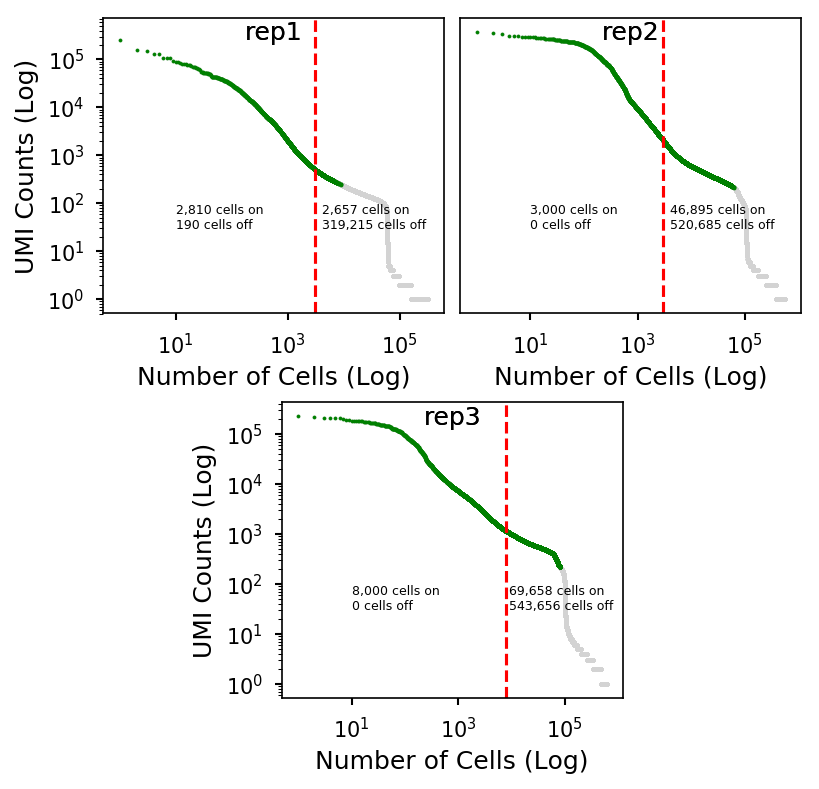

In [5]:
from larval_gonad.plotting import plot_barcode_rank
from larval_gonad.cell_selection import build_umi_gene_count_table

fig = plt.figure()
gs = plt.GridSpec(2, 4, hspace=.3, wspace=.1)
axes = []
axes.append(fig.add_subplot(gs[0, :2]))
axes.append(fig.add_subplot(gs[0, 2:], sharey=axes[0]))
axes.append(fig.add_subplot(gs[1, 1:3]))

for name, cr_cutoff, ax in zip(names, cellranger_cutoffs, axes):
    rep = 'rep' + name[-1]
    ax.text(0.5, .99, rep, ha='center', va='top', transform=ax.transAxes, fontsize=12)
    df = build_umi_gene_count_table(cr_raw.format(name=name), cr_umi.format(name=name))
    cells_on = df.index[df.gene_cnt > 200].tolist()
    
    # Plots
    plot_barcode_rank(df.umi_cnt, selected=cells_on, ax=ax)
    ax.axvline(cr_cutoff, c='r', ls='--')
    ax.text(0.5, .99, rep, ha='center', va='top', transform=ax.transAxes, fontsize=12)

    # Add annotations
    df_sel = df.iloc[:cr_cutoff, :]
    df_sel_on = (df_sel.gene_cnt > 200).sum()
    df_sel_off = (df_sel.gene_cnt <= 200).sum()

    df_nosel = df.iloc[cr_cutoff:, :]
    df_nosel_on = (df_nosel.gene_cnt > 200).sum()
    df_nosel_off = (df_nosel.gene_cnt <= 200).sum()

    ax.text(10, 100, 
            f'{df_sel_on:,} cells on\n'
            f'{df_sel_off:,} cells off', 
            ha='left', va='top', fontsize=6)
    
    ax.text(cr_cutoff + 1000, 100, 
            f'{df_nosel_on:,} cells on\n'
            f'{df_nosel_off:,} cells off', 
            ha='left', va='top', fontsize=6)
    
    ax.set_xlabel('Number of Cells (Log)')
    ax.set_ylabel('UMI Counts (Log)')
    
axes[1].yaxis.set_visible(False)

### UMI vs Gene Counts

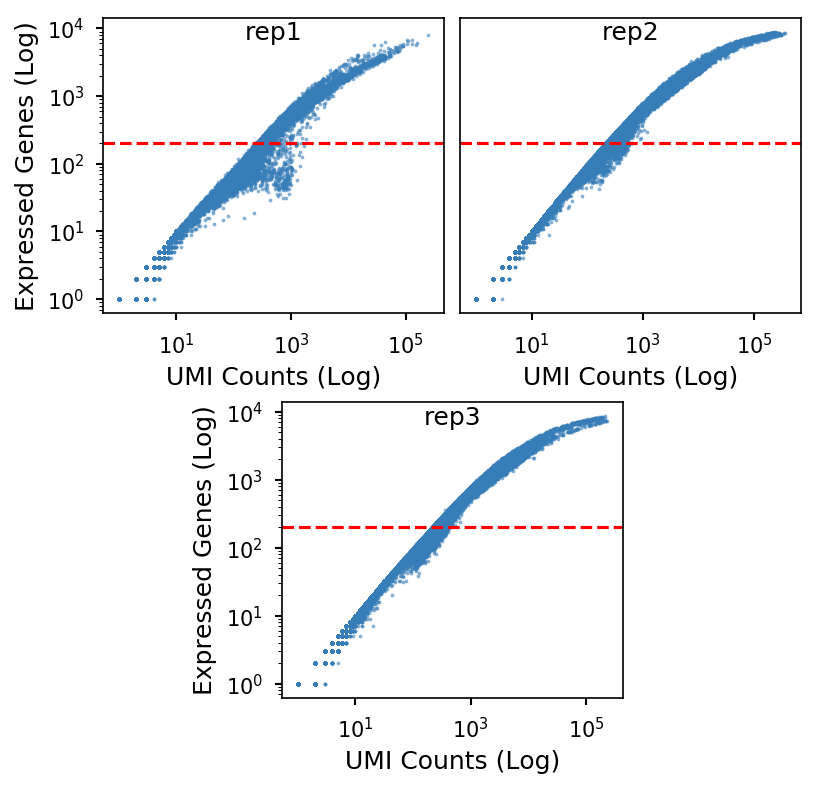

In [58]:
from larval_gonad.cell_selection import build_umi_gene_count_table

fig = plt.figure()
gs = plt.GridSpec(2, 4, hspace=.3, wspace=.1)
axes = []
axes.append(fig.add_subplot(gs[0, :2]))
axes.append(fig.add_subplot(gs[0, 2:], sharey=axes[0]))
axes.append(fig.add_subplot(gs[1, 1:3]))

for name, ax in zip(names, axes):
    rep = 'rep' + name[-1]
    ax.text(0.5, .99, rep, ha='center', va='top', transform=ax.transAxes, fontsize=12)
    df = build_umi_gene_count_table(cr_raw.format(name=name), cr_umi.format(name=name))

    df.plot('umi_cnt', 'gene_cnt', kind='scatter', logx=True, logy=True, ax=ax, s=3, alpha=.6)
    ax.set_xlabel('UMI Counts (Log)')
    ax.set_ylabel('Expressed Genes (Log)')
    ax.axhline(200, c='r', ls='--')
    
axes[1].yaxis.set_visible(False)

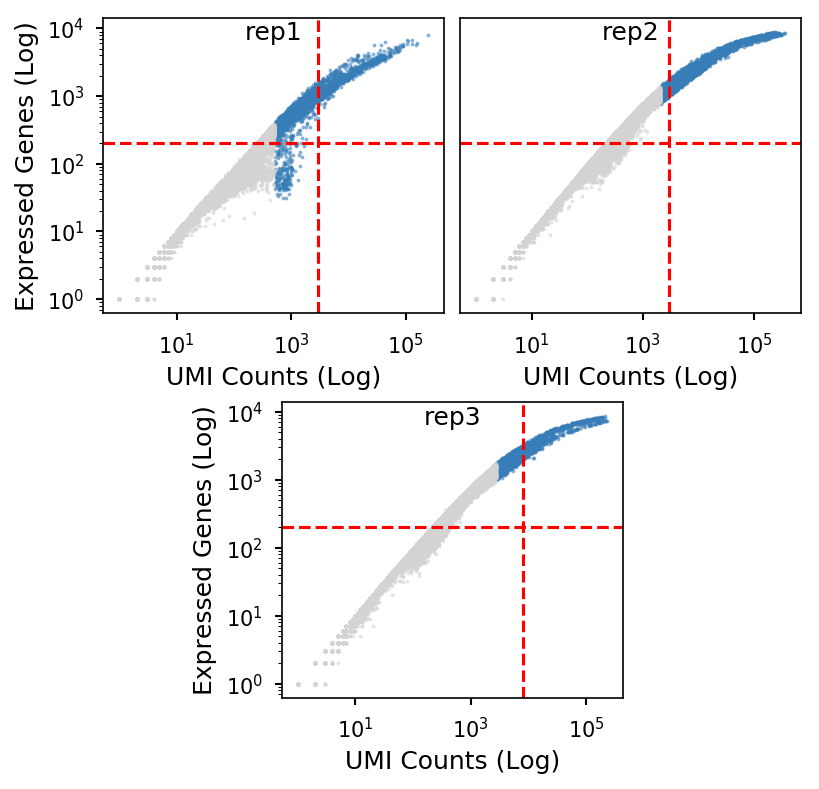

In [60]:
from larval_gonad.cell_selection import build_umi_gene_count_table

fig = plt.figure()
gs = plt.GridSpec(2, 4, hspace=.3, wspace=.1)
axes = []
axes.append(fig.add_subplot(gs[0, :2]))
axes.append(fig.add_subplot(gs[0, 2:], sharey=axes[0]))
axes.append(fig.add_subplot(gs[1, 1:3]))

for name, ax in zip(names, axes):
    rep = 'rep' + name[-1]
    ax.text(0.5, .99, rep, ha='center', va='top', transform=ax.transAxes, fontsize=12)
    df = build_umi_gene_count_table(cr_raw.format(name=name), cr_umi.format(name=name))

    df.iloc[:3000, :].plot('umi_cnt', 'gene_cnt', kind='scatter', logx=True, logy=True, ax=ax, s=3, alpha=.6)
    df.iloc[3000:, :].plot('umi_cnt', 'gene_cnt', kind='scatter', logx=True, logy=True, ax=ax, s=3, alpha=.6, c='lightgrey')
    ax.set_xlabel('UMI Counts (Log)')
    ax.set_ylabel('Expressed Genes (Log)')
    ax.axhline(200, c='r', ls='--')
    
axes[1].yaxis.set_visible(False)

### Dispersion

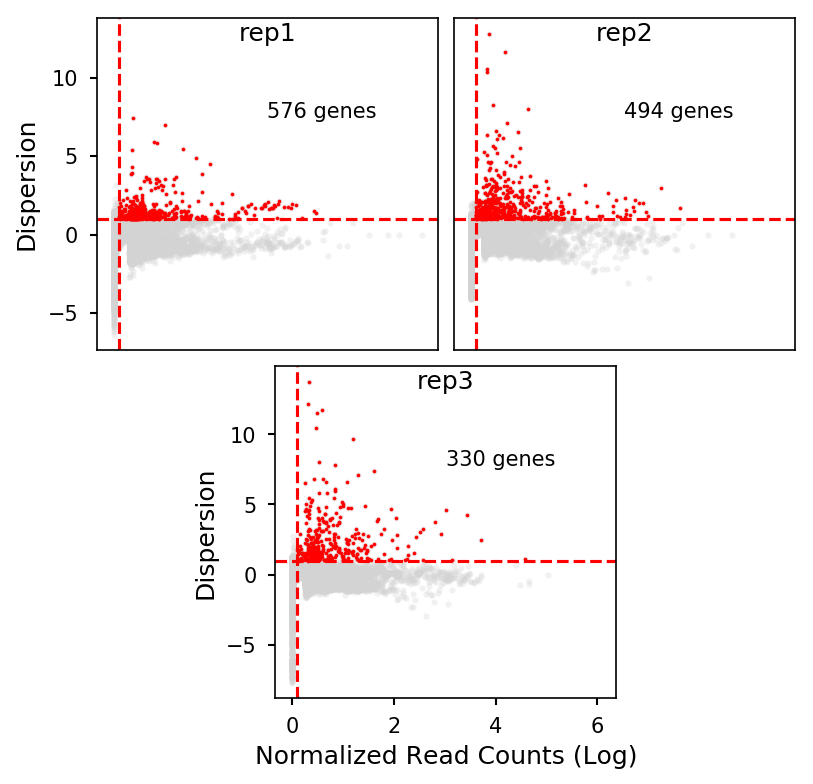

In [47]:
fig = plt.figure()
gs = plt.GridSpec(2, 4, hspace=.05, wspace=.1)
axes = []
axes.append(fig.add_subplot(gs[0, :2]))
axes.append(fig.add_subplot(gs[0, 2:], sharex=axes[0], sharey=axes[0]))
axes.append(fig.add_subplot(gs[1, 1:3], sharex=axes[0]))

for name, ax in zip(names, axes):
    rep = 'rep' + name[-1]
    ax.text(0.5, .99, rep, ha='center', va='top', transform=ax.transAxes, fontsize=12)
    
    dat = pd.read_csv(Path(nbconfig.seurat_dir, f'{rep}_dispersion.tsv'), sep='\t', usecols=['gene.mean', 'gene.dispersion.scaled'])
    genes = pd.read_csv(Path(nbconfig.seurat_dir, f'{rep}_var_genes.tsv'), sep='\t').V1.values
    
    x, y = dat.columns
    dat.plot(x, y, kind='scatter', ax=ax, s=8, alpha=0.3, c='lightgrey')
    dat.loc[genes, :].plot(x, y, kind='scatter', color='r', ax=ax, s=3)
    ax.text(.5, .7, f'{len(genes):,} genes',  transform=ax.transAxes, fontsize=10)
 
    ax.axhline(1, c='r', ls='--')
    ax.axvline(.1, c='r', ls='--')
    ax.set_xlabel('Normalized Read Counts (Log)')
    ax.set_ylabel('Dispersion')
    
axes[0].xaxis.set_visible(False)
axes[1].xaxis.set_visible(False)
axes[1].yaxis.set_visible(False)

### CCA

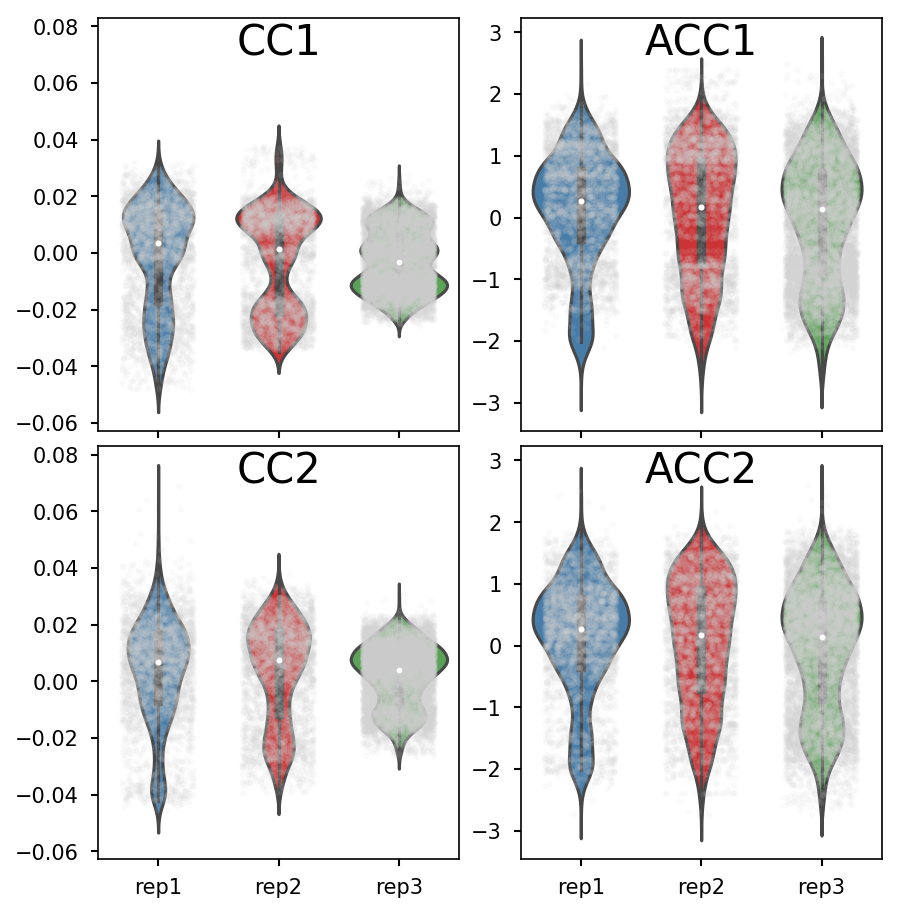

In [57]:
def plot_cca_acca():
    cca = pd.read_csv(Path(nbconfig.seurat_dir, 'cca_cell.tsv'), sep='\t', usecols=['CC1', 'CC2'])
    aligned = pd.read_csv(Path(nbconfig.seurat_dir, 'cca_aligned_cell.tsv'), sep='\t', usecols=['ACC1', 'ACC2'])

    cell = cca.join(aligned)
    cell['rep'] = np.array(cell.index.str.split('_').tolist())[:, 0]


    fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, sharex=True, sharey='col')

    sns.stripplot(x='rep', y='CC1', data=cell, color='lightgrey', jitter=.3, alpha=.1, size=3, ax=ax1)
    sns.violinplot(x='rep', y='CC1', data=cell, ax=ax1)
    ax1.text(.5, .99, 'CC1', ha='center', va='top', transform=ax1.transAxes)
    ax1.set_xlabel('')
    ax1.set_ylabel('')

    sns.stripplot(x='rep', y='ACC1', data=cell, color='lightgrey', jitter=.3, alpha=.1, size=3, ax=ax2)
    sns.violinplot(x='rep', y='ACC2', data=cell, ax=ax2)
    ax2.text(.5, .99, 'ACC1', ha='center', va='top', transform=ax2.transAxes)
    ax2.set_xlabel('')
    ax2.set_ylabel('')

    sns.stripplot(x='rep', y='CC2', data=cell, color='lightgrey', jitter=.3, alpha=.1, size=3, ax=ax3)
    sns.violinplot(x='rep', y='CC2', data=cell, ax=ax3)
    ax3.text(.5, .99, 'CC2', ha='center', va='top', transform=ax3.transAxes)
    ax3.set_xlabel('')
    ax3.set_ylabel('')

    sns.stripplot(x='rep', y='ACC2', data=cell, color='lightgrey', jitter=.3, alpha=.1, size=3, ax=ax4)
    sns.violinplot(x='rep', y='ACC2', data=cell, ax=ax4)
    ax4.text(.5, .99, 'ACC2', ha='center', va='top', transform=ax4.transAxes)
    ax4.set_xlabel('')
    ax4.set_ylabel('')

    plt.tight_layout(pad=.2)
    
plot_cca_acca()

### tSNE

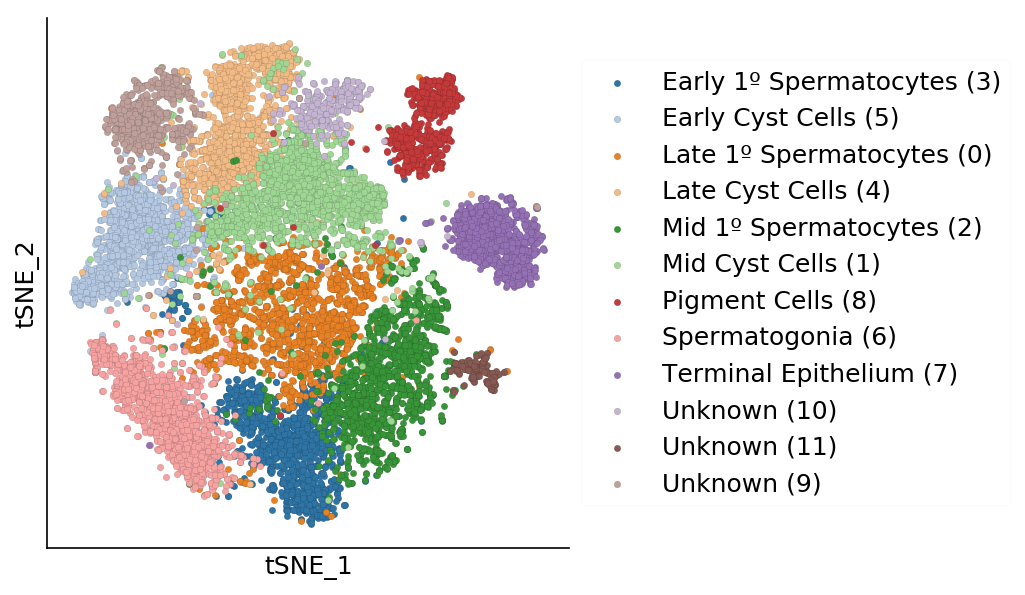

In [64]:
from larval_gonad.scRNAseq import CLUSTER_ANNOT
from larval_gonad.plotting import TSNEPlot
colors = sns.color_palette('tab20', n_colors=12, desat=.8)
tsne = nbconfig.seurat.get_tsne()
clusters = nbconfig.seurat.get_clusters()['res.0.6']
clusters.name = 'cluster'
dat = tsne.join(clusters)
dat.cluster.replace(CLUSTER_ANNOT, inplace=True)
TSNEPlot(data=dat, hue='cluster', palette=colors, s=10)
ax = plt.gca()
ax.set_aspect('equal')
sns.despine()
plt.tight_layout(rect=[0, 0, .7, 1])

### Cell Number by Cluster

In [170]:
from larval_gonad.scRNAseq import CLUSTER_ANNOT, CLUSTER_ORDER

colors = sns.color_palette('tab20', n_colors=12, desat=.8)

clusters = nbconfig.seurat.get_clusters()['res.0.6']
clusters.name = 'cluster'
clusters.replace(CLUSTER_ANNOT, inplace=True)
clusters = clusters.to_frame()

In [176]:
clusters['rep'] = np.array(list(clusters.index.str.split('_')))[:, 0]

In [195]:
cnts = clusters.groupby(['cluster', 'rep']).size().to_frame().reset_index()
cnts.columns = ['cluster', 'rep', 'cnt']

Text(0,0.5,'Number of Cells')

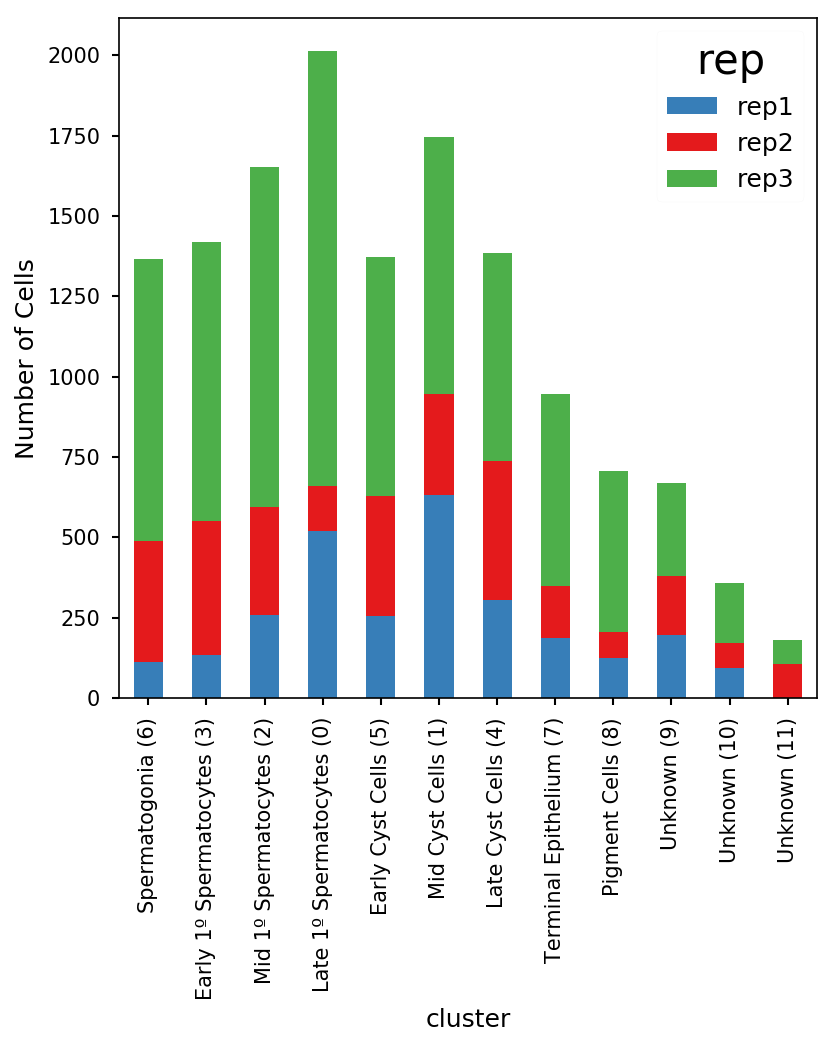

In [201]:
dat = cnts.pivot(index='cluster', columns='rep',  values='cnt').loc[CLUSTER_ORDER, :]
ax = dat.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of Cells')

In [202]:
dat

rep                          rep1   rep2    rep3
cluster                                         
Spermatogonia (6)           111.0  376.0   880.0
Early 1º Spermatocytes (3)  134.0  417.0   867.0
Mid 1º Spermatocytes (2)    257.0  338.0  1056.0
Late 1º Spermatocytes (0)   519.0  139.0  1356.0
Early Cyst Cells (5)        256.0  372.0   745.0
Mid Cyst Cells (1)          631.0  314.0   799.0
Late Cyst Cells (4)         305.0  433.0   646.0
Terminal Epithelium (7)     185.0  164.0   597.0
Pigment Cells (8)           123.0   81.0   503.0
Unknown (9)                 195.0  184.0   291.0
Unknown (10)                 94.0   76.0   186.0
Unknown (11)                  NaN  106.0    74.0

### UMI by cluster

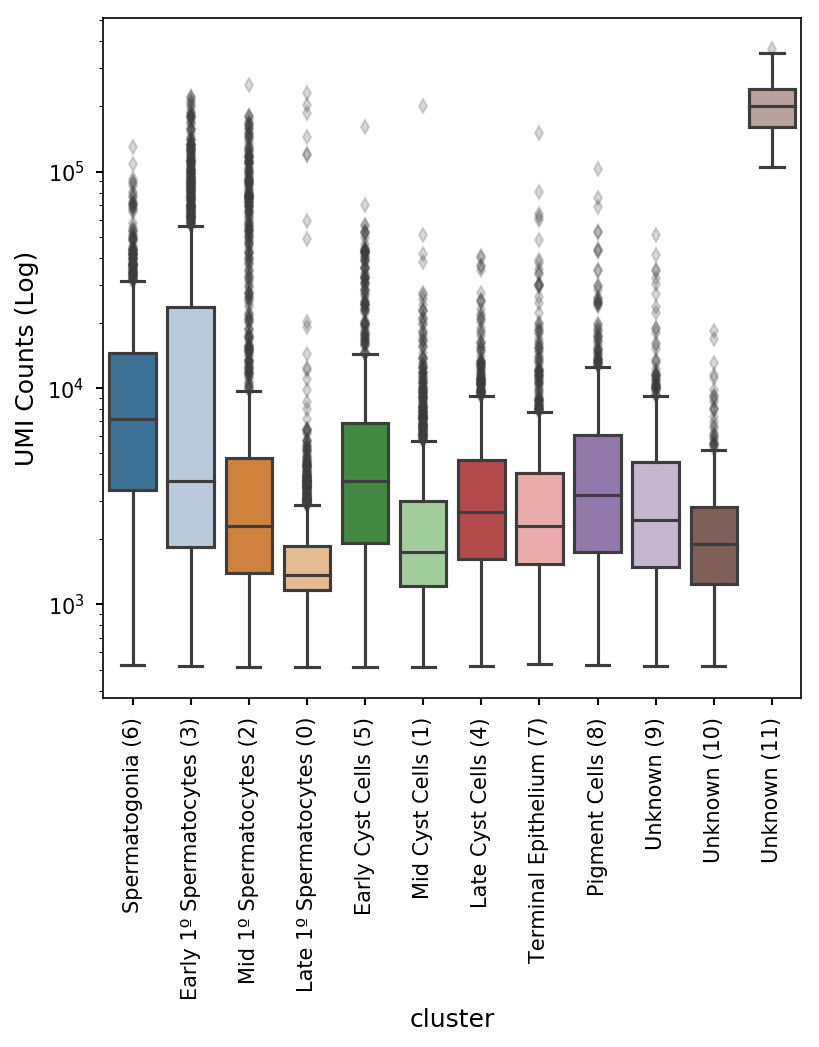

In [107]:
from larval_gonad.cell_selection import build_umi_gene_count_table
from larval_gonad.scRNAseq import CLUSTER_ANNOT, CLUSTER_ORDER

colors = sns.color_palette('tab20', n_colors=12, desat=.8)

dfs = []
for name in names:
    rep = 'rep' + name[-1]
    df = build_umi_gene_count_table(cr_raw.format(name=name), cr_umi.format(name=name))
    df.index = f'{rep}_' + df.index
    dfs.append(df)

umi = pd.concat(dfs)

clusters = nbconfig.seurat.get_clusters()['res.0.6']
clusters.name = 'cluster'
clusters.replace(CLUSTER_ANNOT, inplace=True)

umicluster = umi.join(clusters, how='right')


ax = sns.boxplot('cluster', y='umi_cnt', data=umicluster, order=CLUSTER_ORDER, flierprops={"alpha": .2}, palette=colors)
ax.set_ylabel('UMI Counts (Log)')
ax.set_yscale('log')

for l in ax.get_xticklabels():
    l.set_rotation(90)

### Expressed Gene Count by cluster

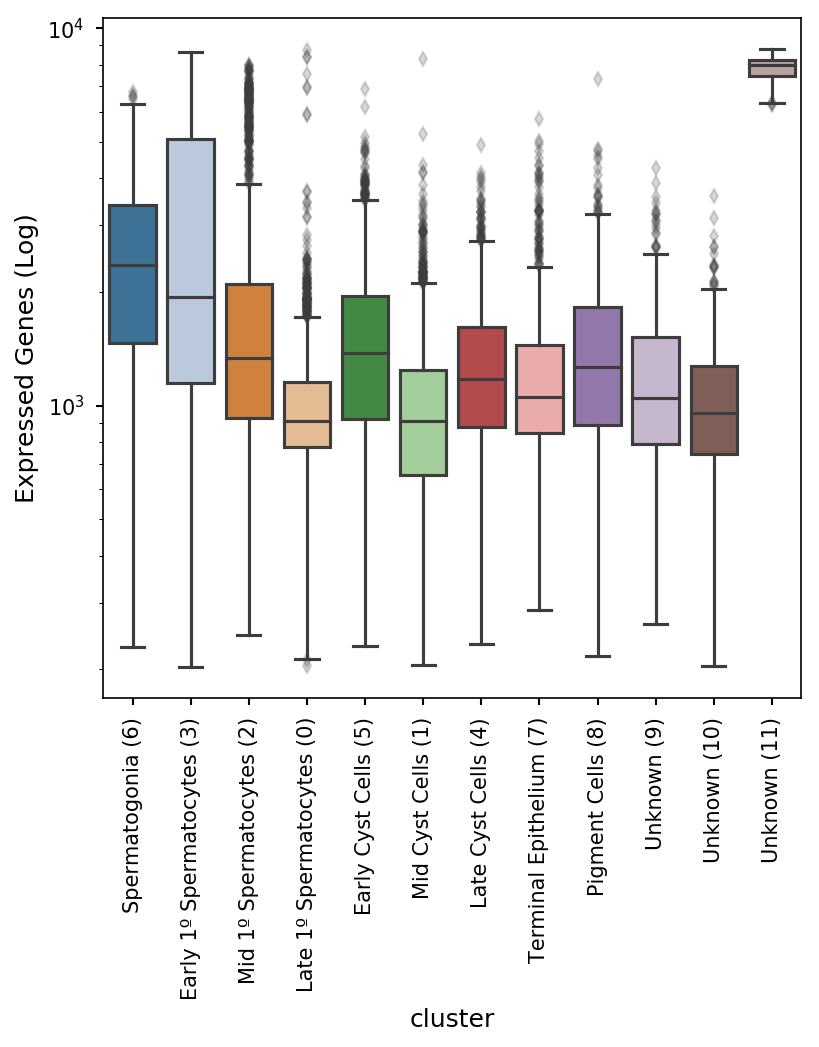

In [108]:
from larval_gonad.cell_selection import build_umi_gene_count_table
from larval_gonad.scRNAseq import CLUSTER_ANNOT, CLUSTER_ORDER

colors = sns.color_palette('tab20', n_colors=12, desat=.8)

dfs = []
for name in names:
    rep = 'rep' + name[-1]
    df = build_umi_gene_count_table(cr_raw.format(name=name), cr_umi.format(name=name))
    df.index = f'{rep}_' + df.index
    dfs.append(df)

gene = pd.concat(dfs)

clusters = nbconfig.seurat.get_clusters()['res.0.6']
clusters.name = 'cluster'
clusters.replace(CLUSTER_ANNOT, inplace=True)

genecluster = gene.join(clusters, how='right')

ax = sns.boxplot('cluster', y='gene_cnt', data=genecluster, order=CLUSTER_ORDER, flierprops={"alpha": .2}, palette=colors)
ax.set_ylabel('Expressed Genes (Log)')
ax.set_yscale('log')

for l in ax.get_xticklabels():
    l.set_rotation(90)

### Cluster markers (One vs Rest)

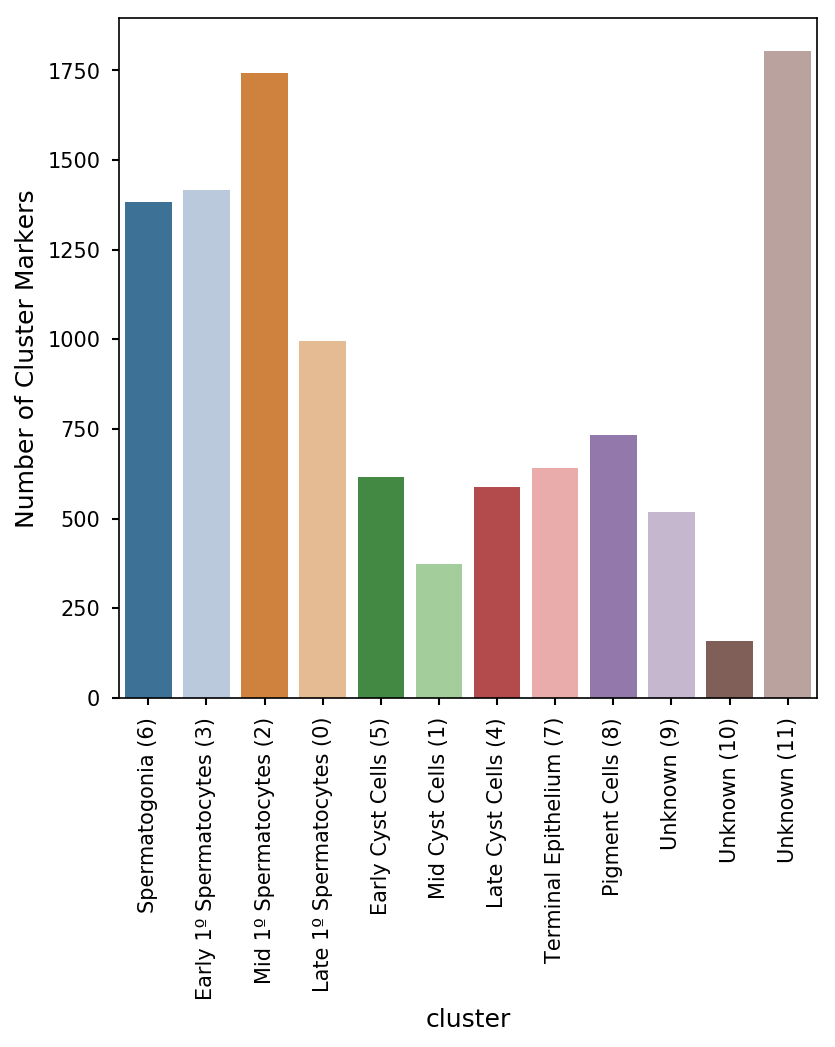

In [126]:
from larval_gonad.scRNAseq import CLUSTER_ANNOT, CLUSTER_ORDER

colors = sns.color_palette('tab20', n_colors=12, desat=.8)

markers = pd.read_csv(Path(nbconfig.seurat_dir, 'biomarkers_res.0.6.tsv'), sep='\t')
markers.cluster.replace(CLUSTER_ANNOT, inplace=True)

number_diff = markers.groupby('cluster').size()
number_diff.name = 'num_markers'
number_diff = number_diff.to_frame().reset_index()

ax = sns.barplot(x='cluster', y='num_markers', data=number_diff, palette=colors, order=CLUSTER_ORDER)
ax.set_ylabel('Number of Cluster Markers')

for l in ax.get_xticklabels():
    l.set_rotation(90)

### Literature Heatmap

In [204]:
import yaml

from larval_gonad.scRNAseq import CLUSTER_ANNOT, CLUSTER_ORDER

clusters = nbconfig.seurat.get_clusters()['res.0.6']
clusters.name = 'cluster'
clusters.replace(CLUSTER_ANNOT, inplace=True)

norm = nbconfig.seurat.get_normalized_read_counts()
dat = norm.T.join(clusters).groupby('cluster').sum().T[CLUSTER_ORDER]

# Get lit supported genes
with open('../paper_submission/config.yaml') as fh:
    config = yaml.load(fh)
   

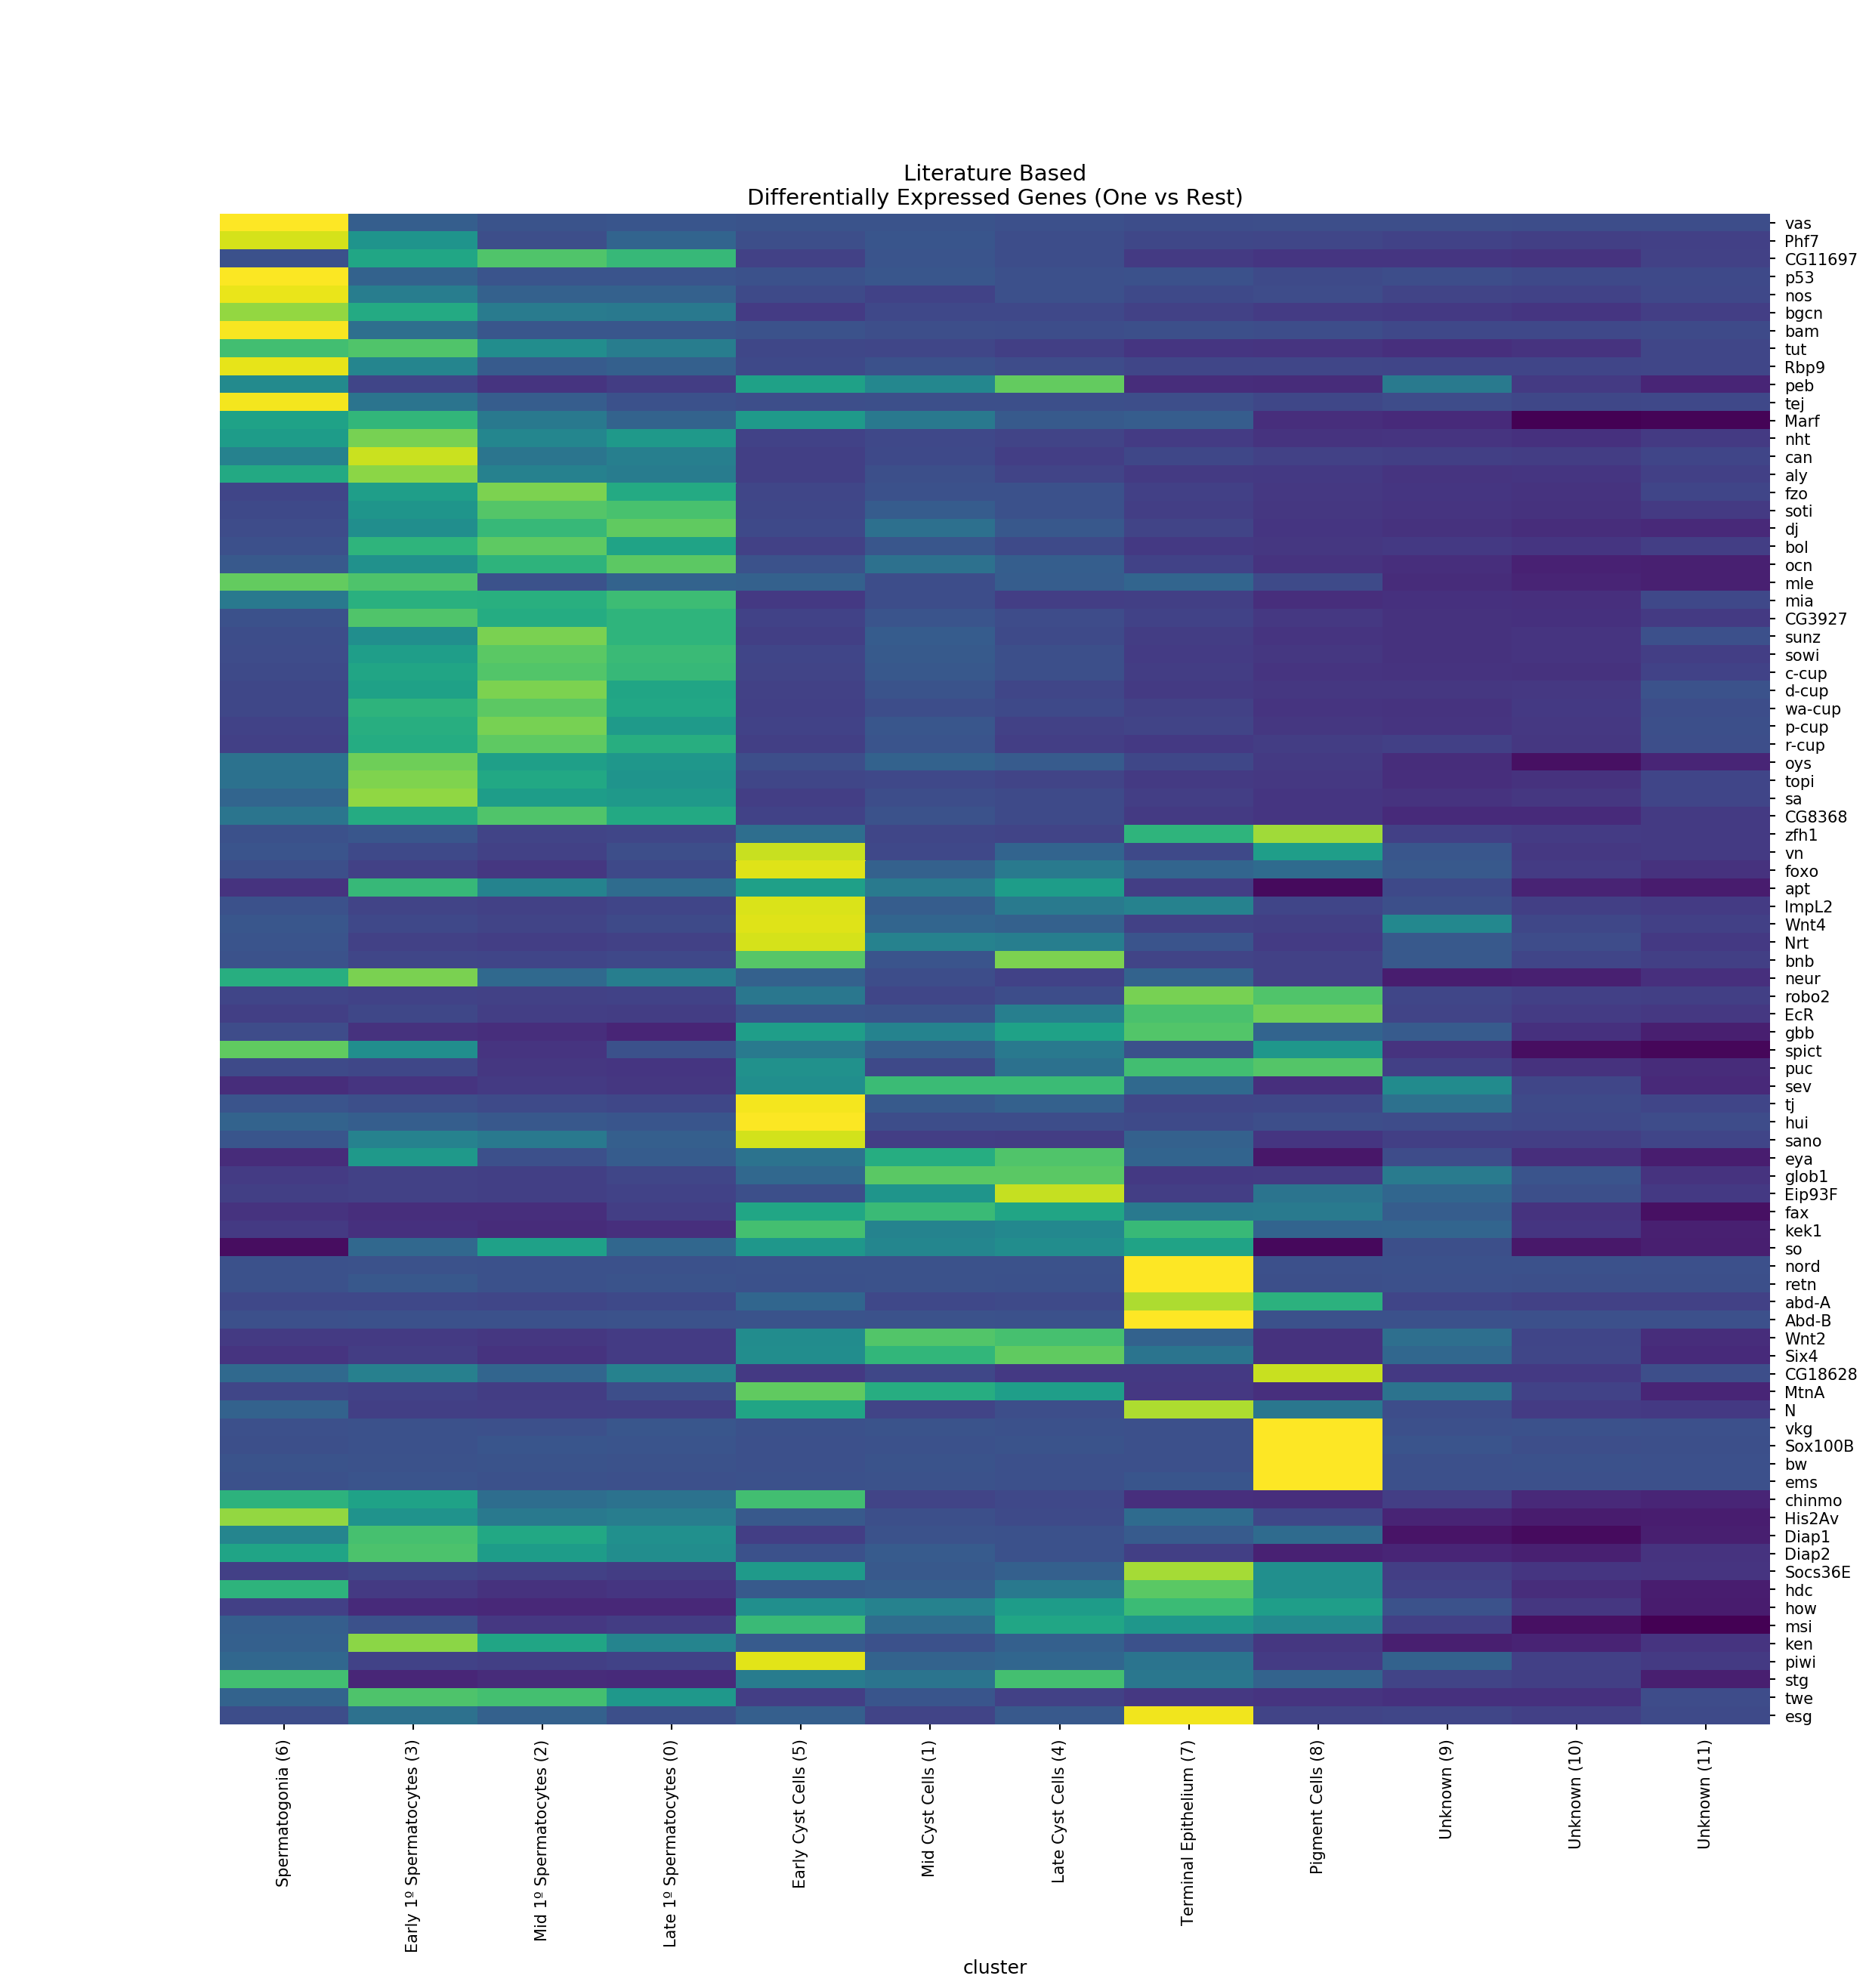

In [211]:
 
select = [nbconfig.symbol2fbgn[g] for g in config['lit_genes']]

g = sns.clustermap(
  dat.loc[select],
  col_cluster=False,
  row_cluster=False,
  z_score=0,
  cmap='viridis',
  rasterized=False,
  figsize=(20, 20),

)

ax = g.ax_heatmap
new_labels = []
for l in ax.get_yticklabels():
    new_labels.append(nbconfig.fbgn2symbol[l.get_text()])

ax.set_yticklabels(new_labels)
ax.set_title('Literature Based\nDifferentially Expressed Genes (One vs Rest)')
g.cax.set_visible(False)

## Bulk RNA-Seq

In [37]:
pd.read_csv('../bulk-rnaseq-wf/config/sampletable.tsv', sep='\t')

samplename                                      orig_filename group wellID  \
0       A1_TF  ../data/rnaseq_samples/180213_run0618/Sample_A...    TF     A1   
1      A10_FT  ../data/rnaseq_samples/180213_run0618/Sample_A...    FT    A10   
2      A11_FT  ../data/rnaseq_samples/180213_run0618/Sample_A...    FT    A11   
3      A12_FT  ../data/rnaseq_samples/180213_run0618/Sample_A...    FT    A12   
4       A2_TF  ../data/rnaseq_samples/180213_run0618/Sample_A...    TF     A2   
5       A3_TF  ../data/rnaseq_samples/180213_run0618/Sample_A...    TF     A3   
6       A4_TF  ../data/rnaseq_samples/180213_run0618/Sample_A...    TF     A4   
7       A9_FT  ../data/rnaseq_samples/180213_run0618/Sample_A...    FT     A9   
8      B5_TCP  ../data/rnaseq_samples/180213_run0618/Sample_B...   TCP     B5   
9      B6_TCP  ../data/rnaseq_samples/180213_run0618/Sample_B...   TCP     B6   
10     B7_TCP  ../data/rnaseq_samples/180213_run0618/Sample_B...   TCP     B7   
11     B8_TCP  ../data/rnaseq_samples/180213_run0618/Sample_B...   TCP     B8   
12     C1_TDT  ../data/rnaseq_samples/180213_run0618/Sample_C...   TDT     C1   
13     C2_TDT  ../data/rnaseq_samples/180213_run0618/Sample_C...   TDT     C2   
14     C3_TDT  ../data/rnaseq_samples/180213_run0618/Sample_C...   TDT     C3   
15     C4_TDT  ../data/rnaseq_samples/180213_run0618/Sample_C...   TDT     C4   
16    F10_TDP  ../data/rnaseq_samples/180213_run0618/Sample_F...   TDP    F10   
17    F11_TDP  ../data/rnaseq_samples/180213_run0618/Sample_F...   TDP    F11   
18    F12_TDP  ../data/rnaseq_samples/180213_run0618/Sample_F...   TDP    F12   
19     F9_TDP  ../data/rnaseq_samples/180213_run0618/Sample_F...   TDP     F9   

   row  col  num_parts sex  testis  ovary  fatbody ercc  
0    A    1         10   m       1      0        1    A  
1    A   10         10   m       0      0        1    B  
2    A   11         10   m       0      0        1    A  
3    A   12         10   m       0      0        1    B  
4    A    2         10   m       1      0        1    B  
5    A    3         10   m       1      0        1    A  
6    A    4         10   m       1      0        1    B  
7    A    9         10   m       0      0        1    A  
8    B    5         15   m       1      0        0    A  
9    B    6         15   m       1      0        0    B  
10   B    7         15   m       1      0        0    A  
11   B    8         15   m       1      0        0    B  
12   C    1         15   m       1      0        0    A  
13   C    2         15   m       1      0        0    B  
14   C    3         15   m       1      0        0    A  
15   C    4         15   m       1      0        0    B  
16   F   10         15   m       1      0        0    B  
17   F   11         15   m       1      0        0    A  
18   F   12         15   m       1      0        0    B  
19   F    9         15   m       1      0        0    A

### Correlation Among Replicates

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


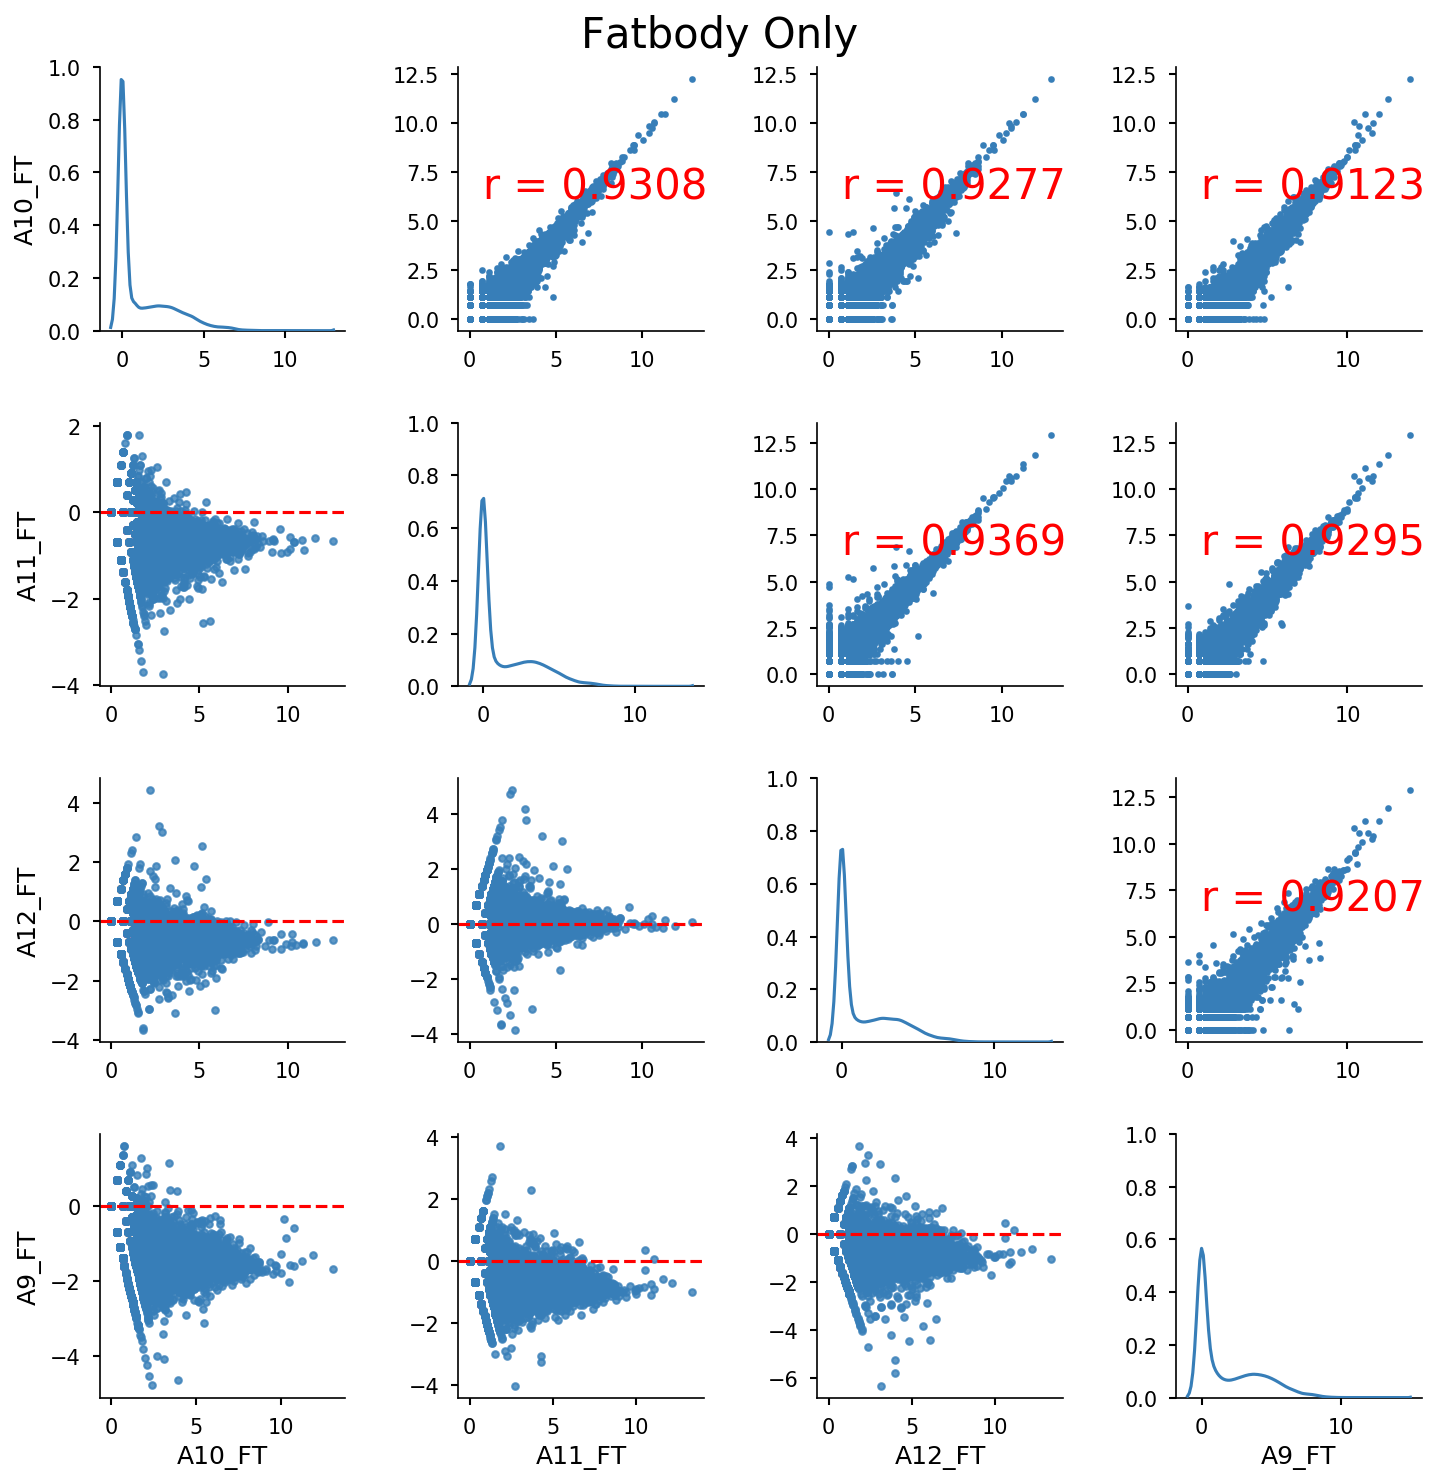

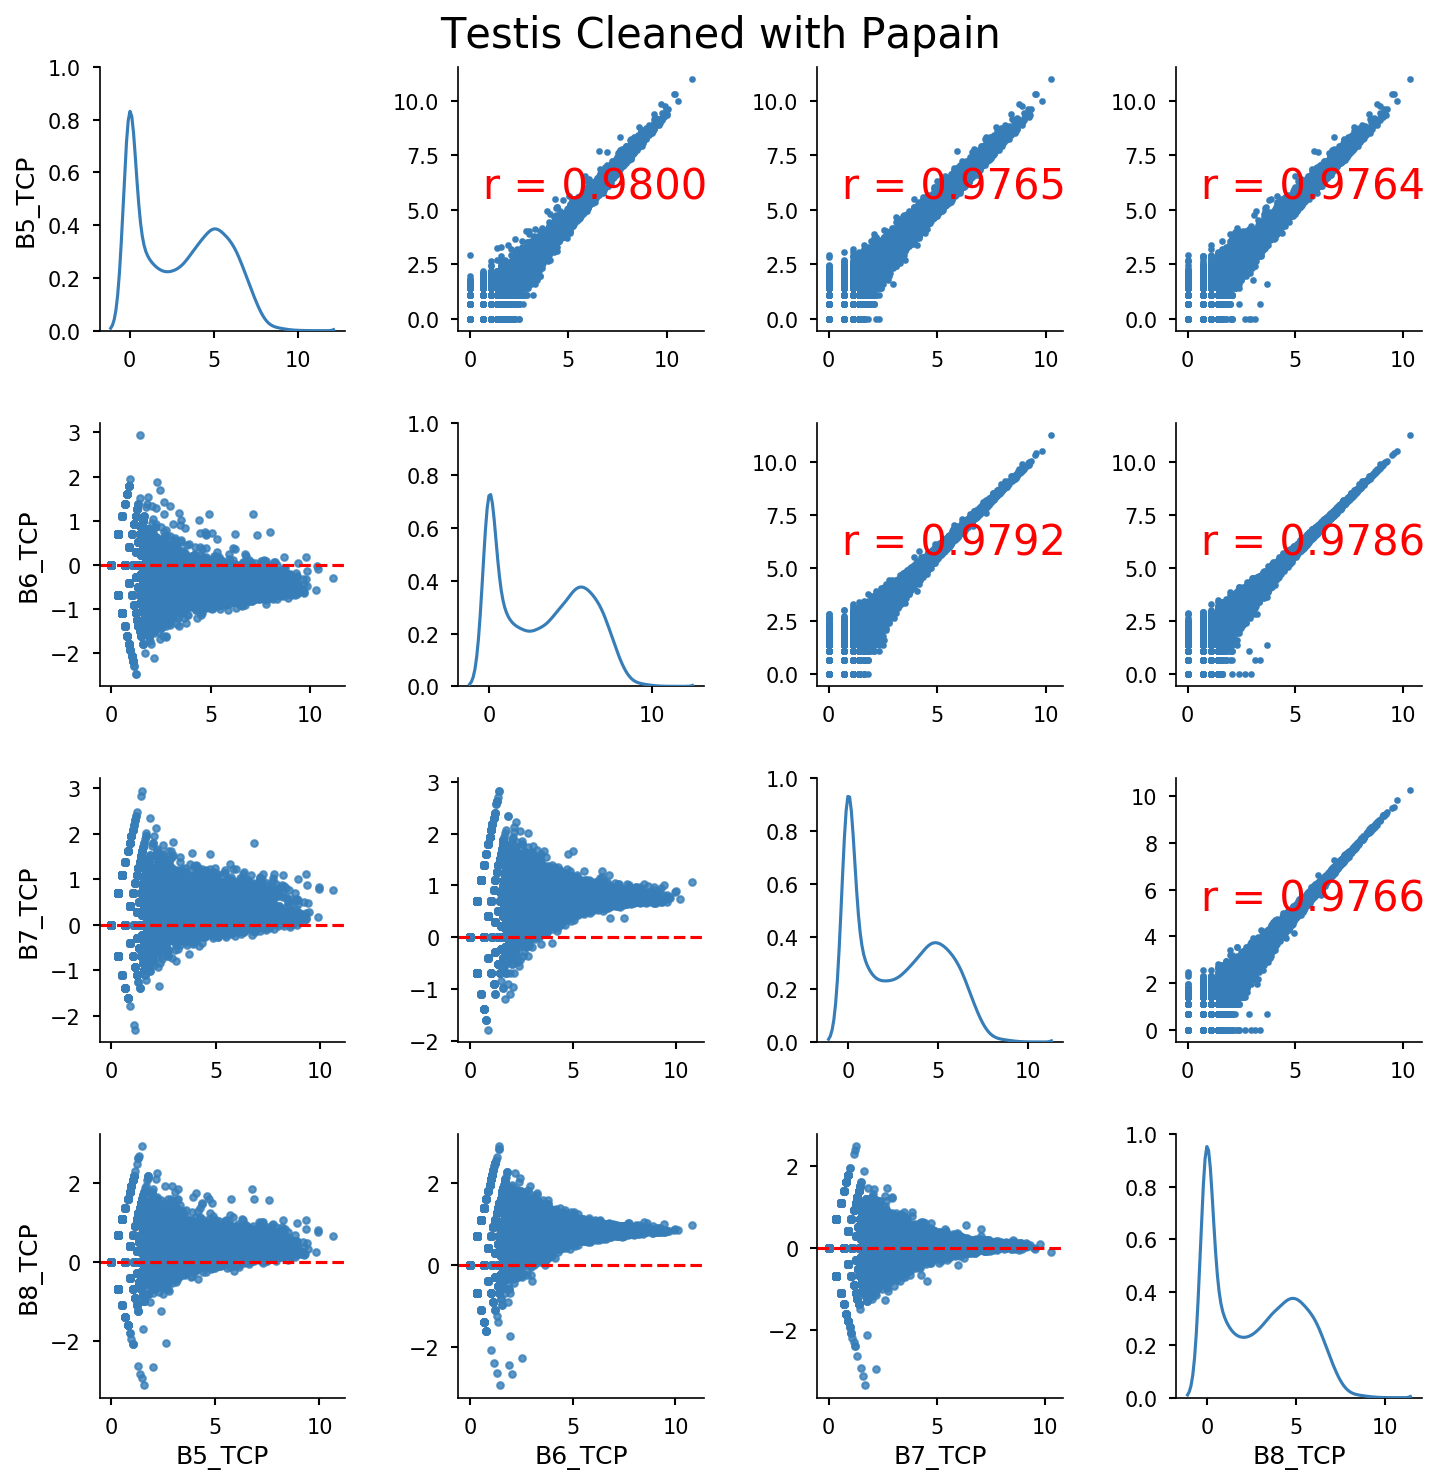

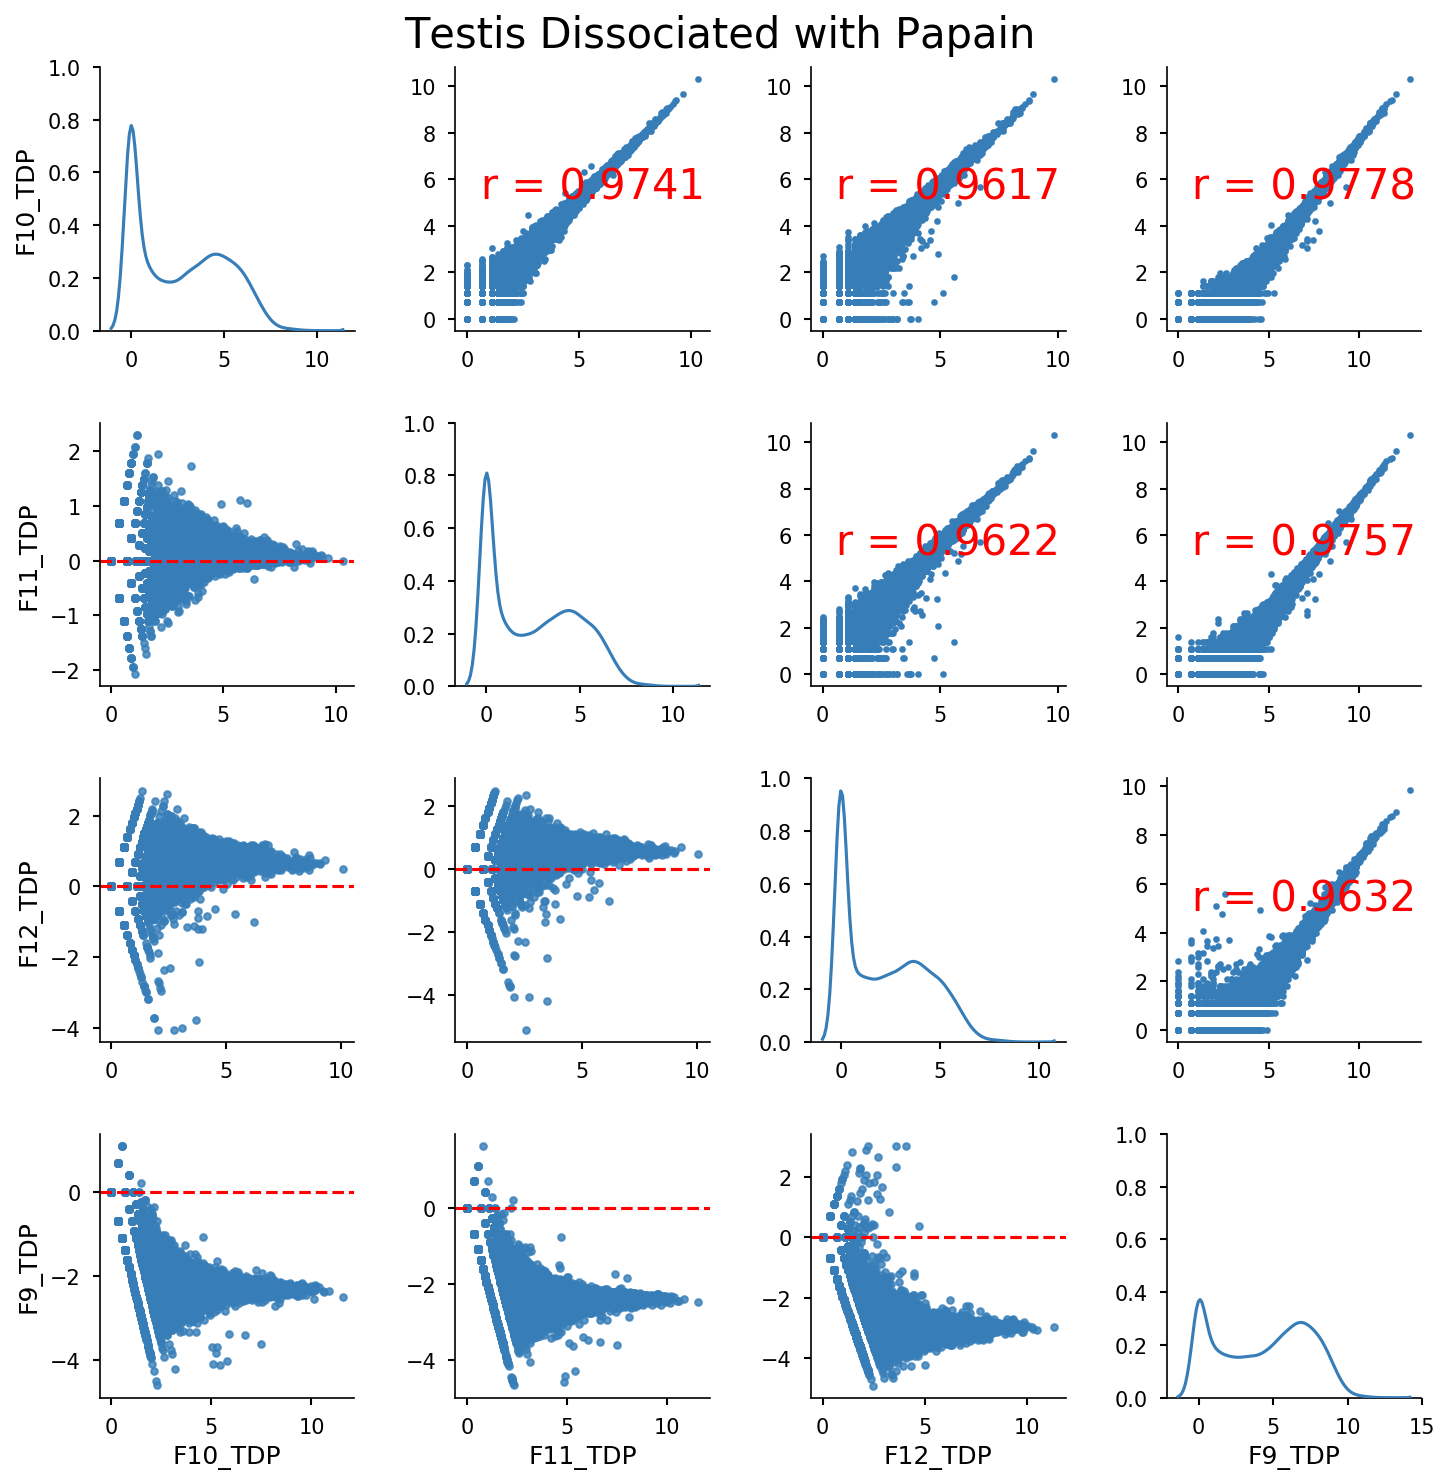

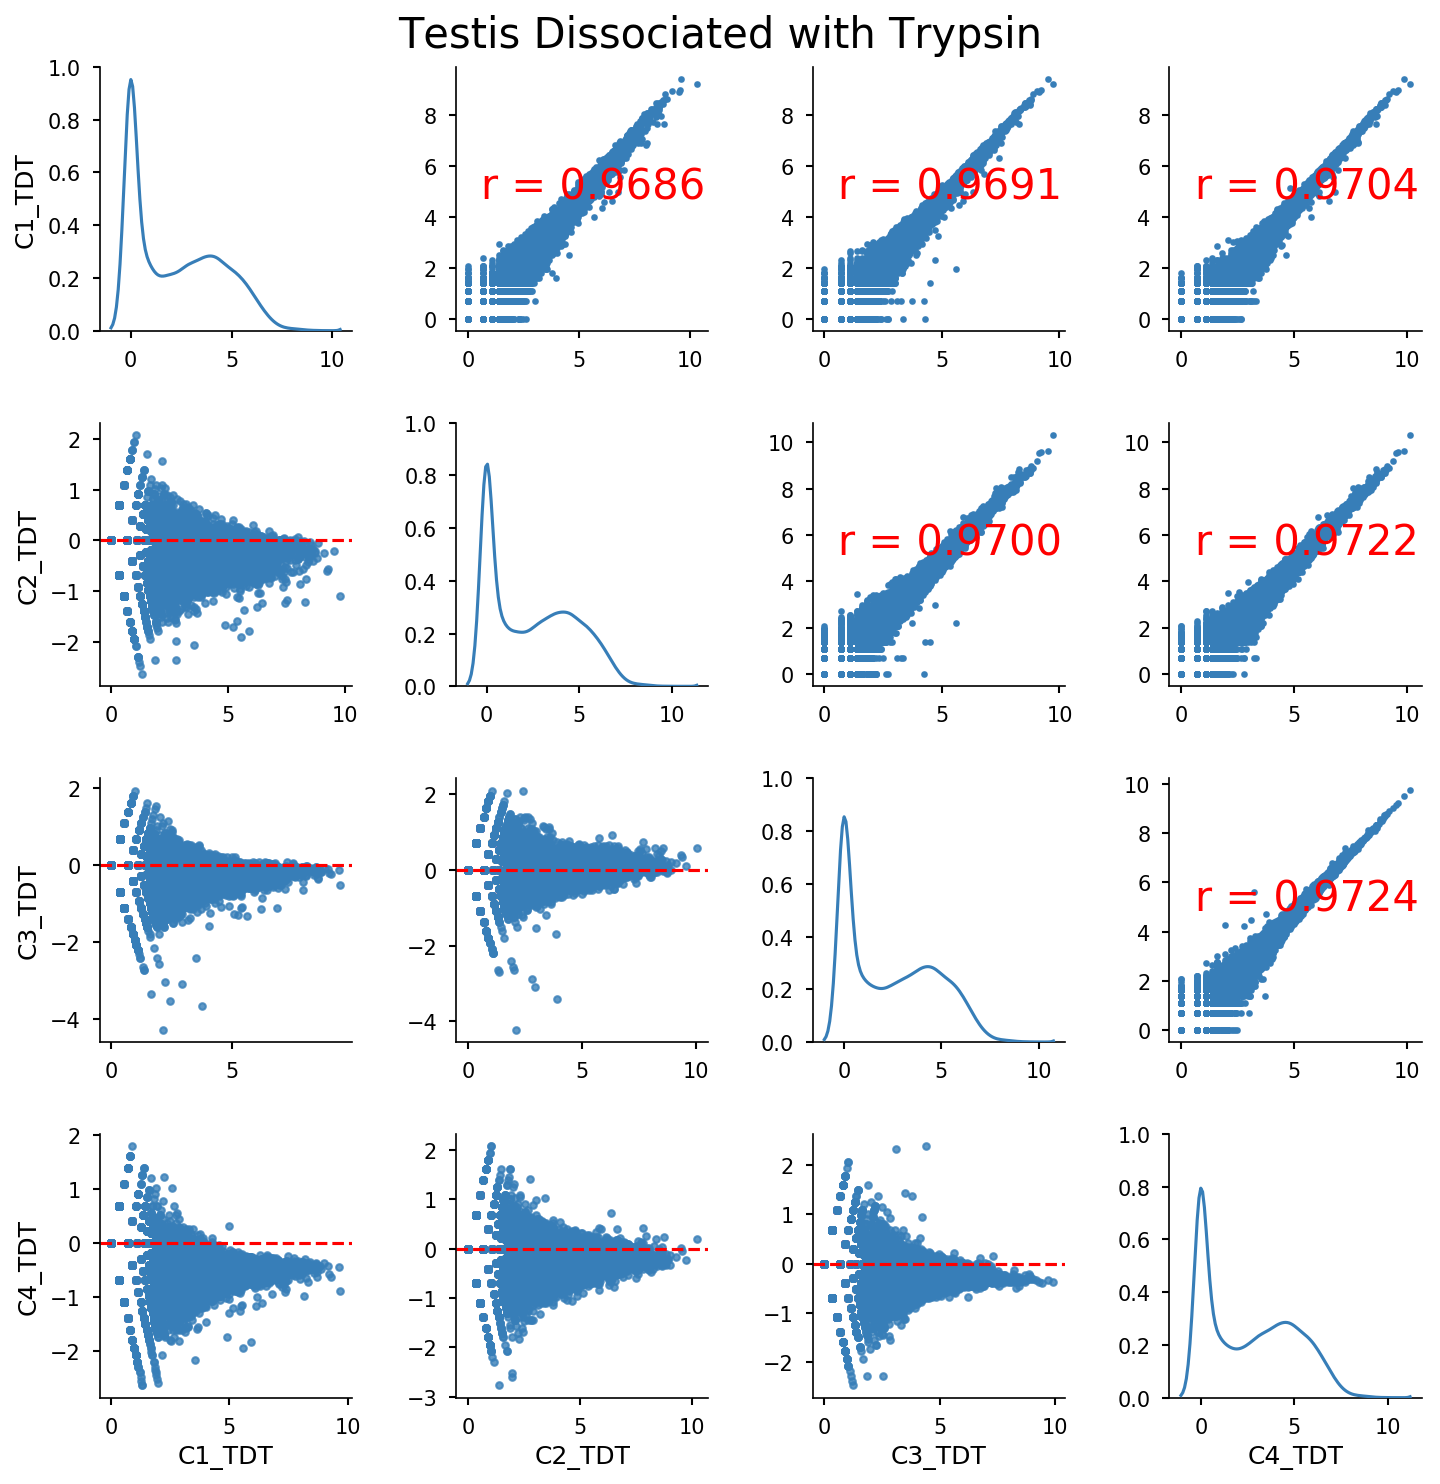

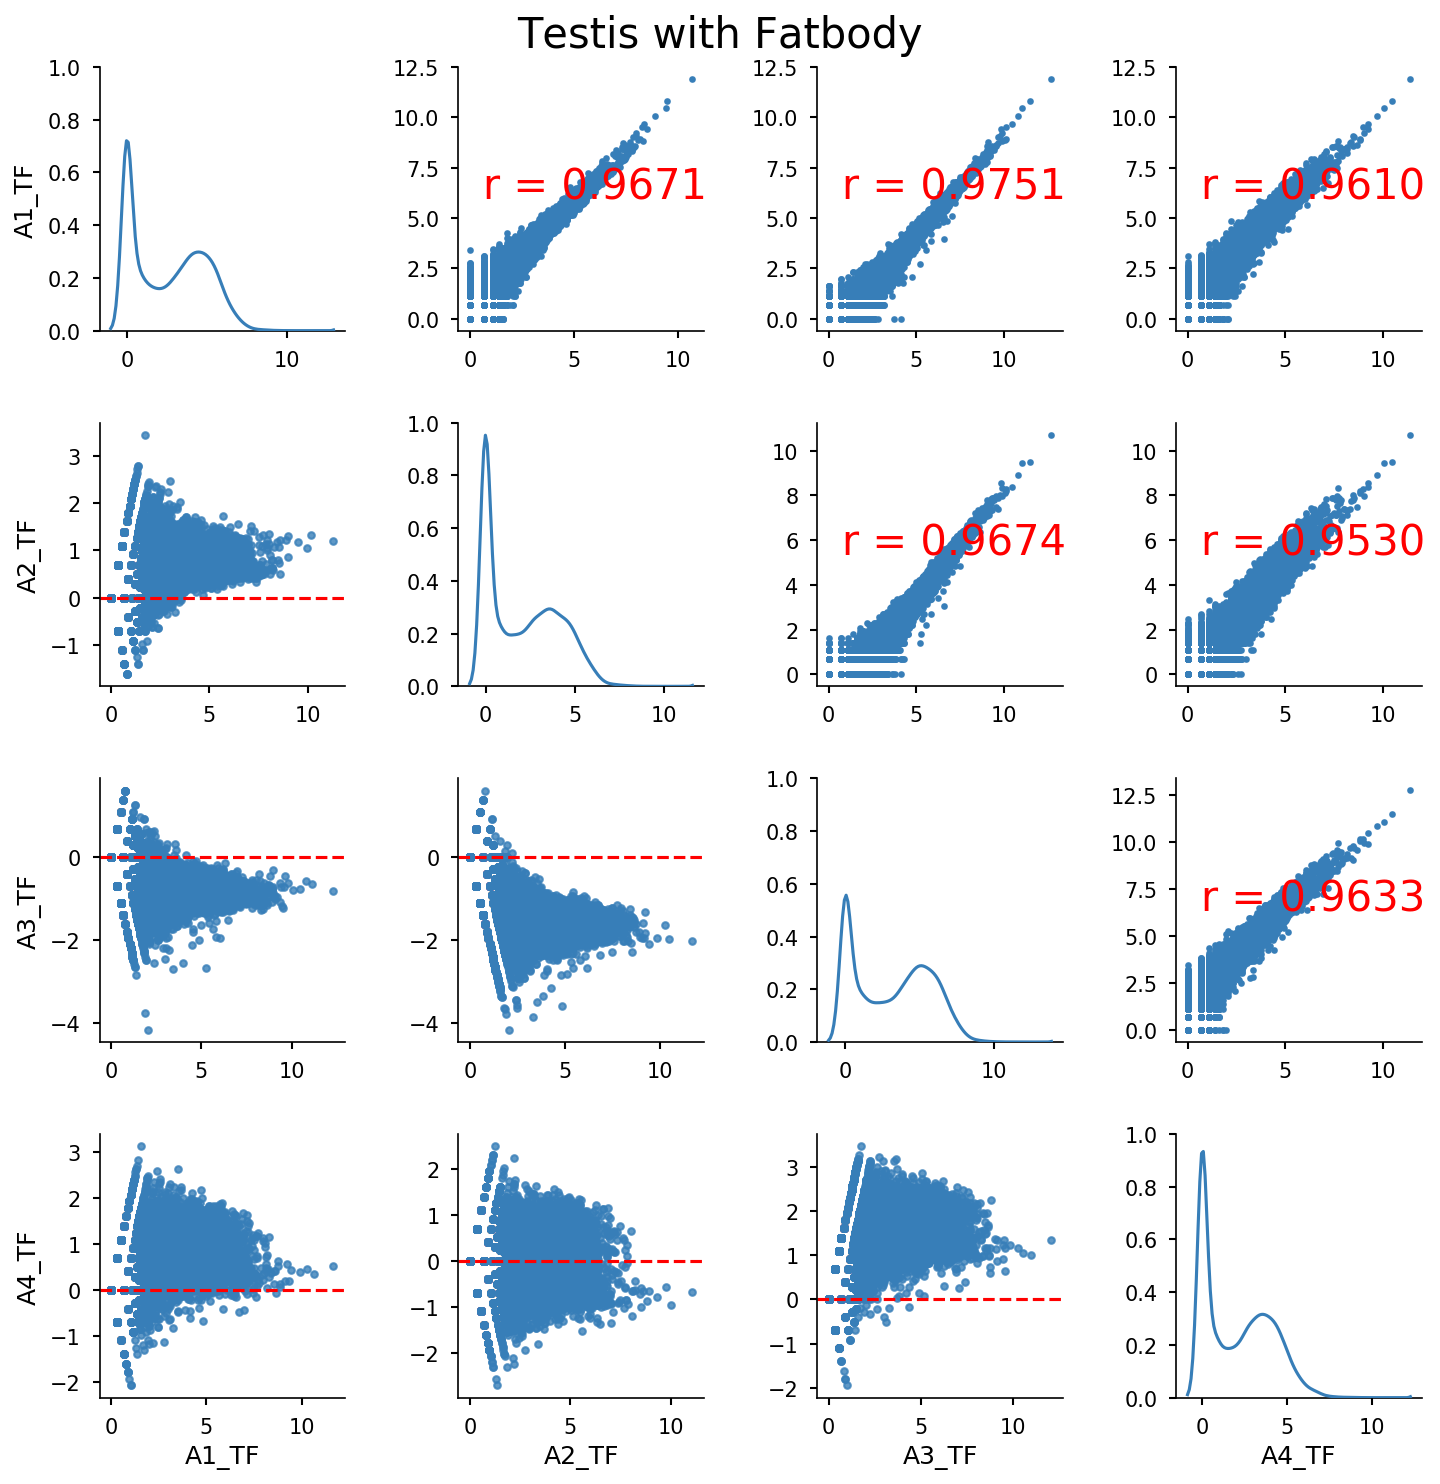

In [38]:
from larval_gonad.bulk import read_bulk, plot_bulk_pairwise_corr

stable = pd.read_csv('../bulk-rnaseq-wf/config/sampletable.tsv', sep='\t')
_filter = stable.samplename.tolist()
annot = {
    'FT': 'Fatbody Only',
    'TF': 'Testis with Fatbody',
    'TCP': 'Testis Cleaned with Papain',
    'TDP': 'Testis Dissociated with Papain',
    'TDT': 'Testis Dissociated with Trypsin',
}

df = read_bulk(Path('../output/bulk-rnaseq-wf/rnaseq_samples'), filter=_filter)

for grp, dd in stable.groupby('group'):
    _dat = df.loc[:, dd.samplename]
    g = plot_bulk_pairwise_corr(np.log1p(_dat), corrfunc_kws={'color': 'r'})
    plt.tight_layout()
    fig = plt.gcf()
    plt.text(.5, 1, annot[grp], ha='center', va='top', transform=fig.transFigure)

### ERCC Counts vs Expected

In [5]:
from larval_gonad.bulk import read_bulk, read_bulk_for_lengths
from larval_gonad.normalization import tpm

# Sample annotation
stable = pd.read_csv('../bulk-rnaseq-wf/config/sampletable.tsv', sep='\t', index_col=0)

# get counts and gene lengths
_filter = stable.index.tolist()
bulk = read_bulk(Path('../output/bulk-rnaseq-wf/rnaseq_samples'), filter=_filter)
gene_lens = read_bulk_for_lengths(Path('../output/bulk-rnaseq-wf/rnaseq_samples'), filter=_filter)

# Get ercc annotation
cols = ['ERCC_Control', 'Subpool_in_pool_78', '78A_nmol_per_ul', '78B_nmol_per_ul']
lee_anno = pd.read_csv('http://www.jgenomics.com/v04/p0019/jgenv04p0019s1.csv', 
                        usecols=cols,index_col=0)

# normalize and split
bulk_tpm = tpm(bulk, gene_lens, log='log10')
ercc_tpm = bulk_tpm[bulk_tpm.index.str.startswith('ERCC')]

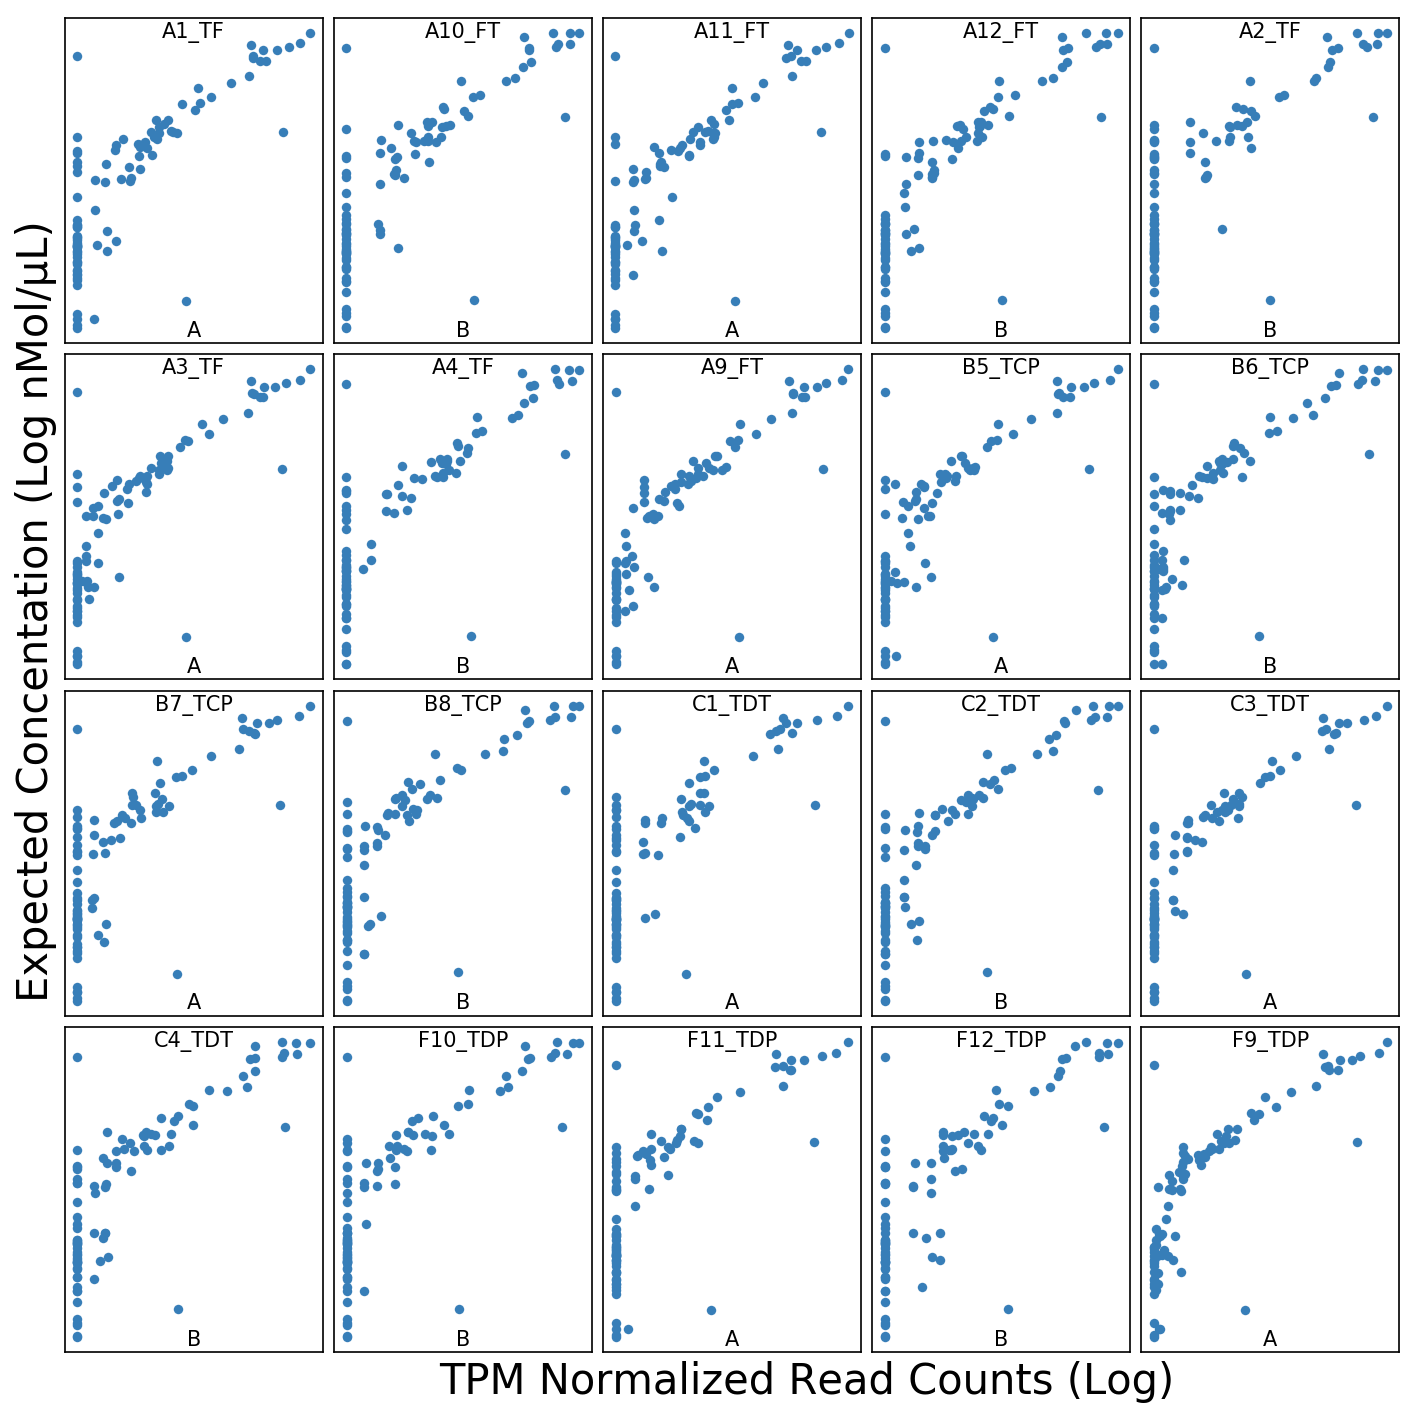

In [8]:
fig, axes = plt.subplots(4, 5, figsize=(10, 10))
mapper = {
    'A': '78A_nmol_per_ul',
    'B': '78B_nmol_per_ul',
}

for (record, ax) in zip(stable.to_records(), axes.flatten()):
    _sample = record.samplename
    _pool = record.ercc
    ercc_tpm.join(lee_anno).plot(_sample, mapper[_pool], kind='scatter', logy=True, ax=ax)
    ax.text(0.5, .99, _sample, ha='center', va='top', fontsize=10, transform=ax.transAxes)
    ax.text(0.5, .01, _pool, ha='center', va='bottom', fontsize=10, transform=ax.transAxes)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
plt.text(0, 0.5, 'Expected Concentation (Log nMol/µL)', 
         ha='right', va='center', 
         transform=fig.transFigure, rotation=90)
plt.text(0.5, 0, 'TPM Normalized Read Counts (Log)', 
         ha='center', va='top', 
         transform=fig.transFigure)
plt.tight_layout(pad=.1, rect=[0, 0, .9, .9])

### ERCC Ratios

In [4]:
from larval_gonad.bulk import read_bulk, read_bulk_for_lengths
from larval_gonad.normalization import tpm

# Sample annotation
stable = pd.read_csv('../bulk-rnaseq-wf/config/sampletable.tsv', sep='\t', index_col=0)
annot = {
    'FT': 'Fatbody Only',
    'TF': 'Testis with Fatbody',
    'TCP': 'Testis Cleaned with Papain',
    'TDP': 'Testis Dissociated with Papain',
    'TDT': 'Testis Dissociated with Trypsin',
}

# get counts and gene lengths
_filter = stable.index.tolist()
bulk = read_bulk(Path('../output/bulk-rnaseq-wf/rnaseq_samples'), filter=_filter)
gene_lens = read_bulk_for_lengths(Path('../output/bulk-rnaseq-wf/rnaseq_samples'), filter=_filter)

# Get ercc annotation
cols = ['ERCC_Control', 'Subpool_in_pool_78', '78A_nmol_per_ul', '78B_nmol_per_ul']
lee_anno = pd.read_csv('http://www.jgenomics.com/v04/p0019/jgenv04p0019s1.csv', 
                        usecols=cols,index_col=0)

subpool_annot = lee_anno['Subpool_in_pool_78']
subpool_annot.name = 'subpool'

In [5]:
bulk_tpm = tpm(bulk, gene_lens)

In [6]:
ercc_tpm = bulk_tpm[bulk_tpm.index.str.startswith('ERCC')]

In [7]:
As = stable.query('ercc == "A"').index.tolist()
Bs = stable.query('ercc == "B"').index.tolist()

In [8]:
dfAs = ercc_tpm[As].sum(axis=1).to_frame()
dfAs.columns = ['A']
dfBs = ercc_tpm[Bs].sum(axis=1).to_frame()
dfBs.columns = ['B']

In [20]:
cmap = {
    'A': 'r',
    'B': 'b',
    'C': 'k'
}

dat = np.log2(dfAs.join(dfBs) + 1)
dat['mean'] = dat.mean(axis=1)
dat['diff'] = dat['A'] - dat['B']
dat = dat.join(subpool_annot)
dat['colors'] = dat.subpool.replace(cmap)

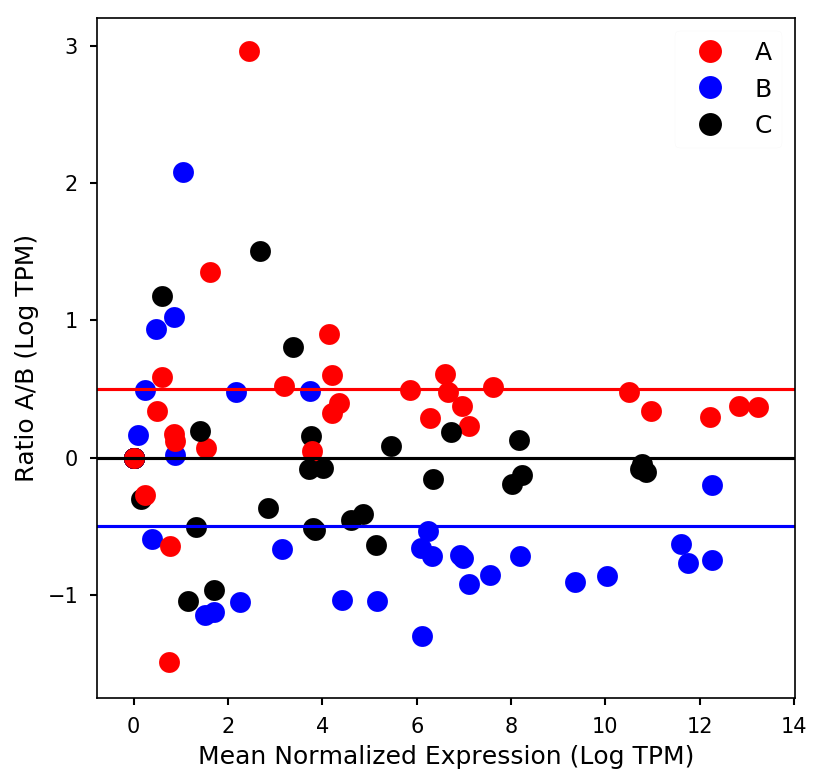

In [28]:
def plot_ma(df, ax=None, title=''):
    if ax is None:
        fig, ax = plt.subplots()
        
    for record in df.to_records():
        _id = record.Geneid
        x = record['mean']
        y = record['diff']
        c = record['colors']
        ax.scatter(x, y, color=c, s=100)
        #ax.annotate(_id, (x, y), xytext=(8, 0), textcoords='offset pixels', fontsize=8)

    lg = [
        mpl.lines.Line2D([0], [0], marker='o', markersize=10, lw=0, color='r', label='A'),
        mpl.lines.Line2D([0], [0], marker='o', markersize=10, lw=0, color='b', label='B'),
        mpl.lines.Line2D([0], [0], marker='o', markersize=10, lw=0, color='k', label='C'),
    ]
    ax.legend(handles=lg)
    ax.set_title(title)
    ax.axhline(.5, color='r')
    ax.axhline(0, color='k')
    ax.axhline(-.5, color='b')
    ax.set_xlabel('Mean Normalized Expression (Log TPM)')
    ax.set_ylabel('Ratio A/B (Log TPM)')
    
plot_ma(dat)

### Bulk Correlation Across Treatments

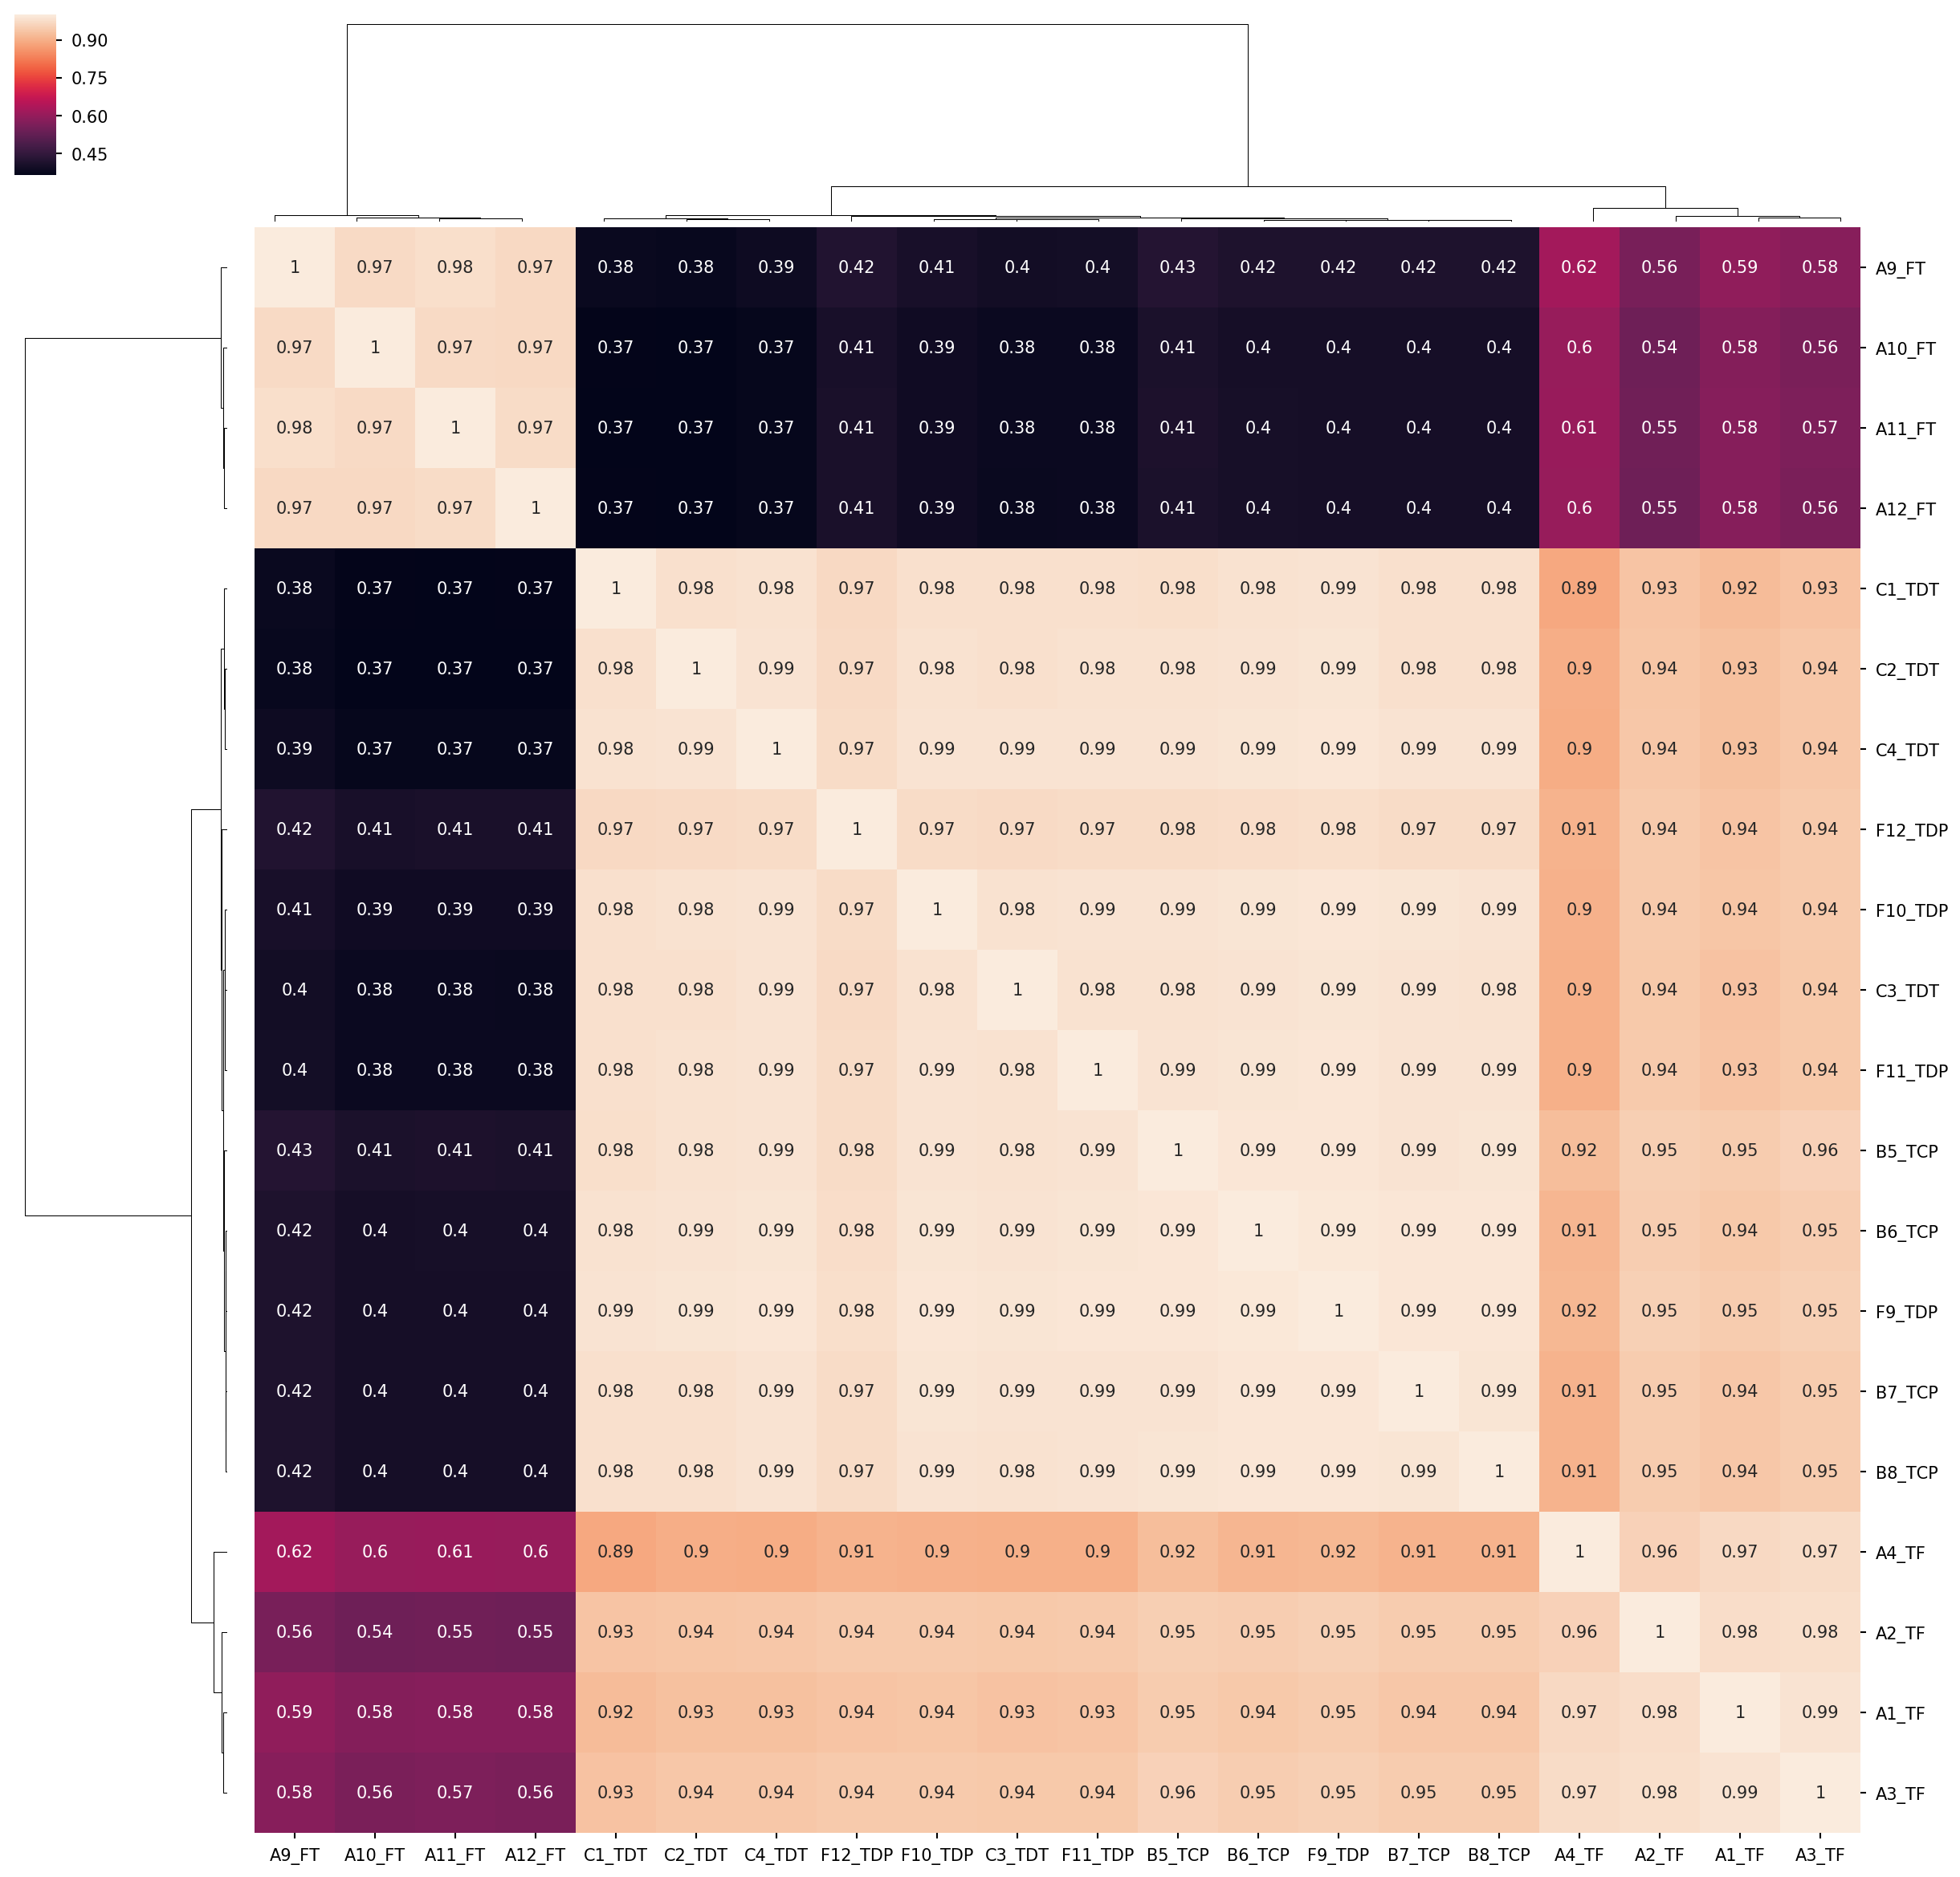

In [9]:
from larval_gonad.bulk import read_bulk, read_bulk_for_lengths 
from larval_gonad.normalization import tpm

stable = pd.read_csv('../bulk-rnaseq-wf/config/sampletable.tsv', sep='\t')
_filter = stable.samplename.tolist()
bulk = read_bulk(Path('../output/bulk-rnaseq-wf/rnaseq_samples'), filter=_filter)
gene_lens = read_bulk_for_lengths(Path('../output/bulk-rnaseq-wf/rnaseq_samples'), filter=_filter)
bulk_tpm = tpm(bulk, gene_lens, log='log10')

g = sns.clustermap(bulk_tpm.corr(), annot=True, square=True, annot_kws={'fontsize': 10}, figsize=(20, 20))

ax = g.ax_heatmap
for l in ax.get_yticklabels():
    l.set_rotation(0)

### Bulk vs scRNA Replicates

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


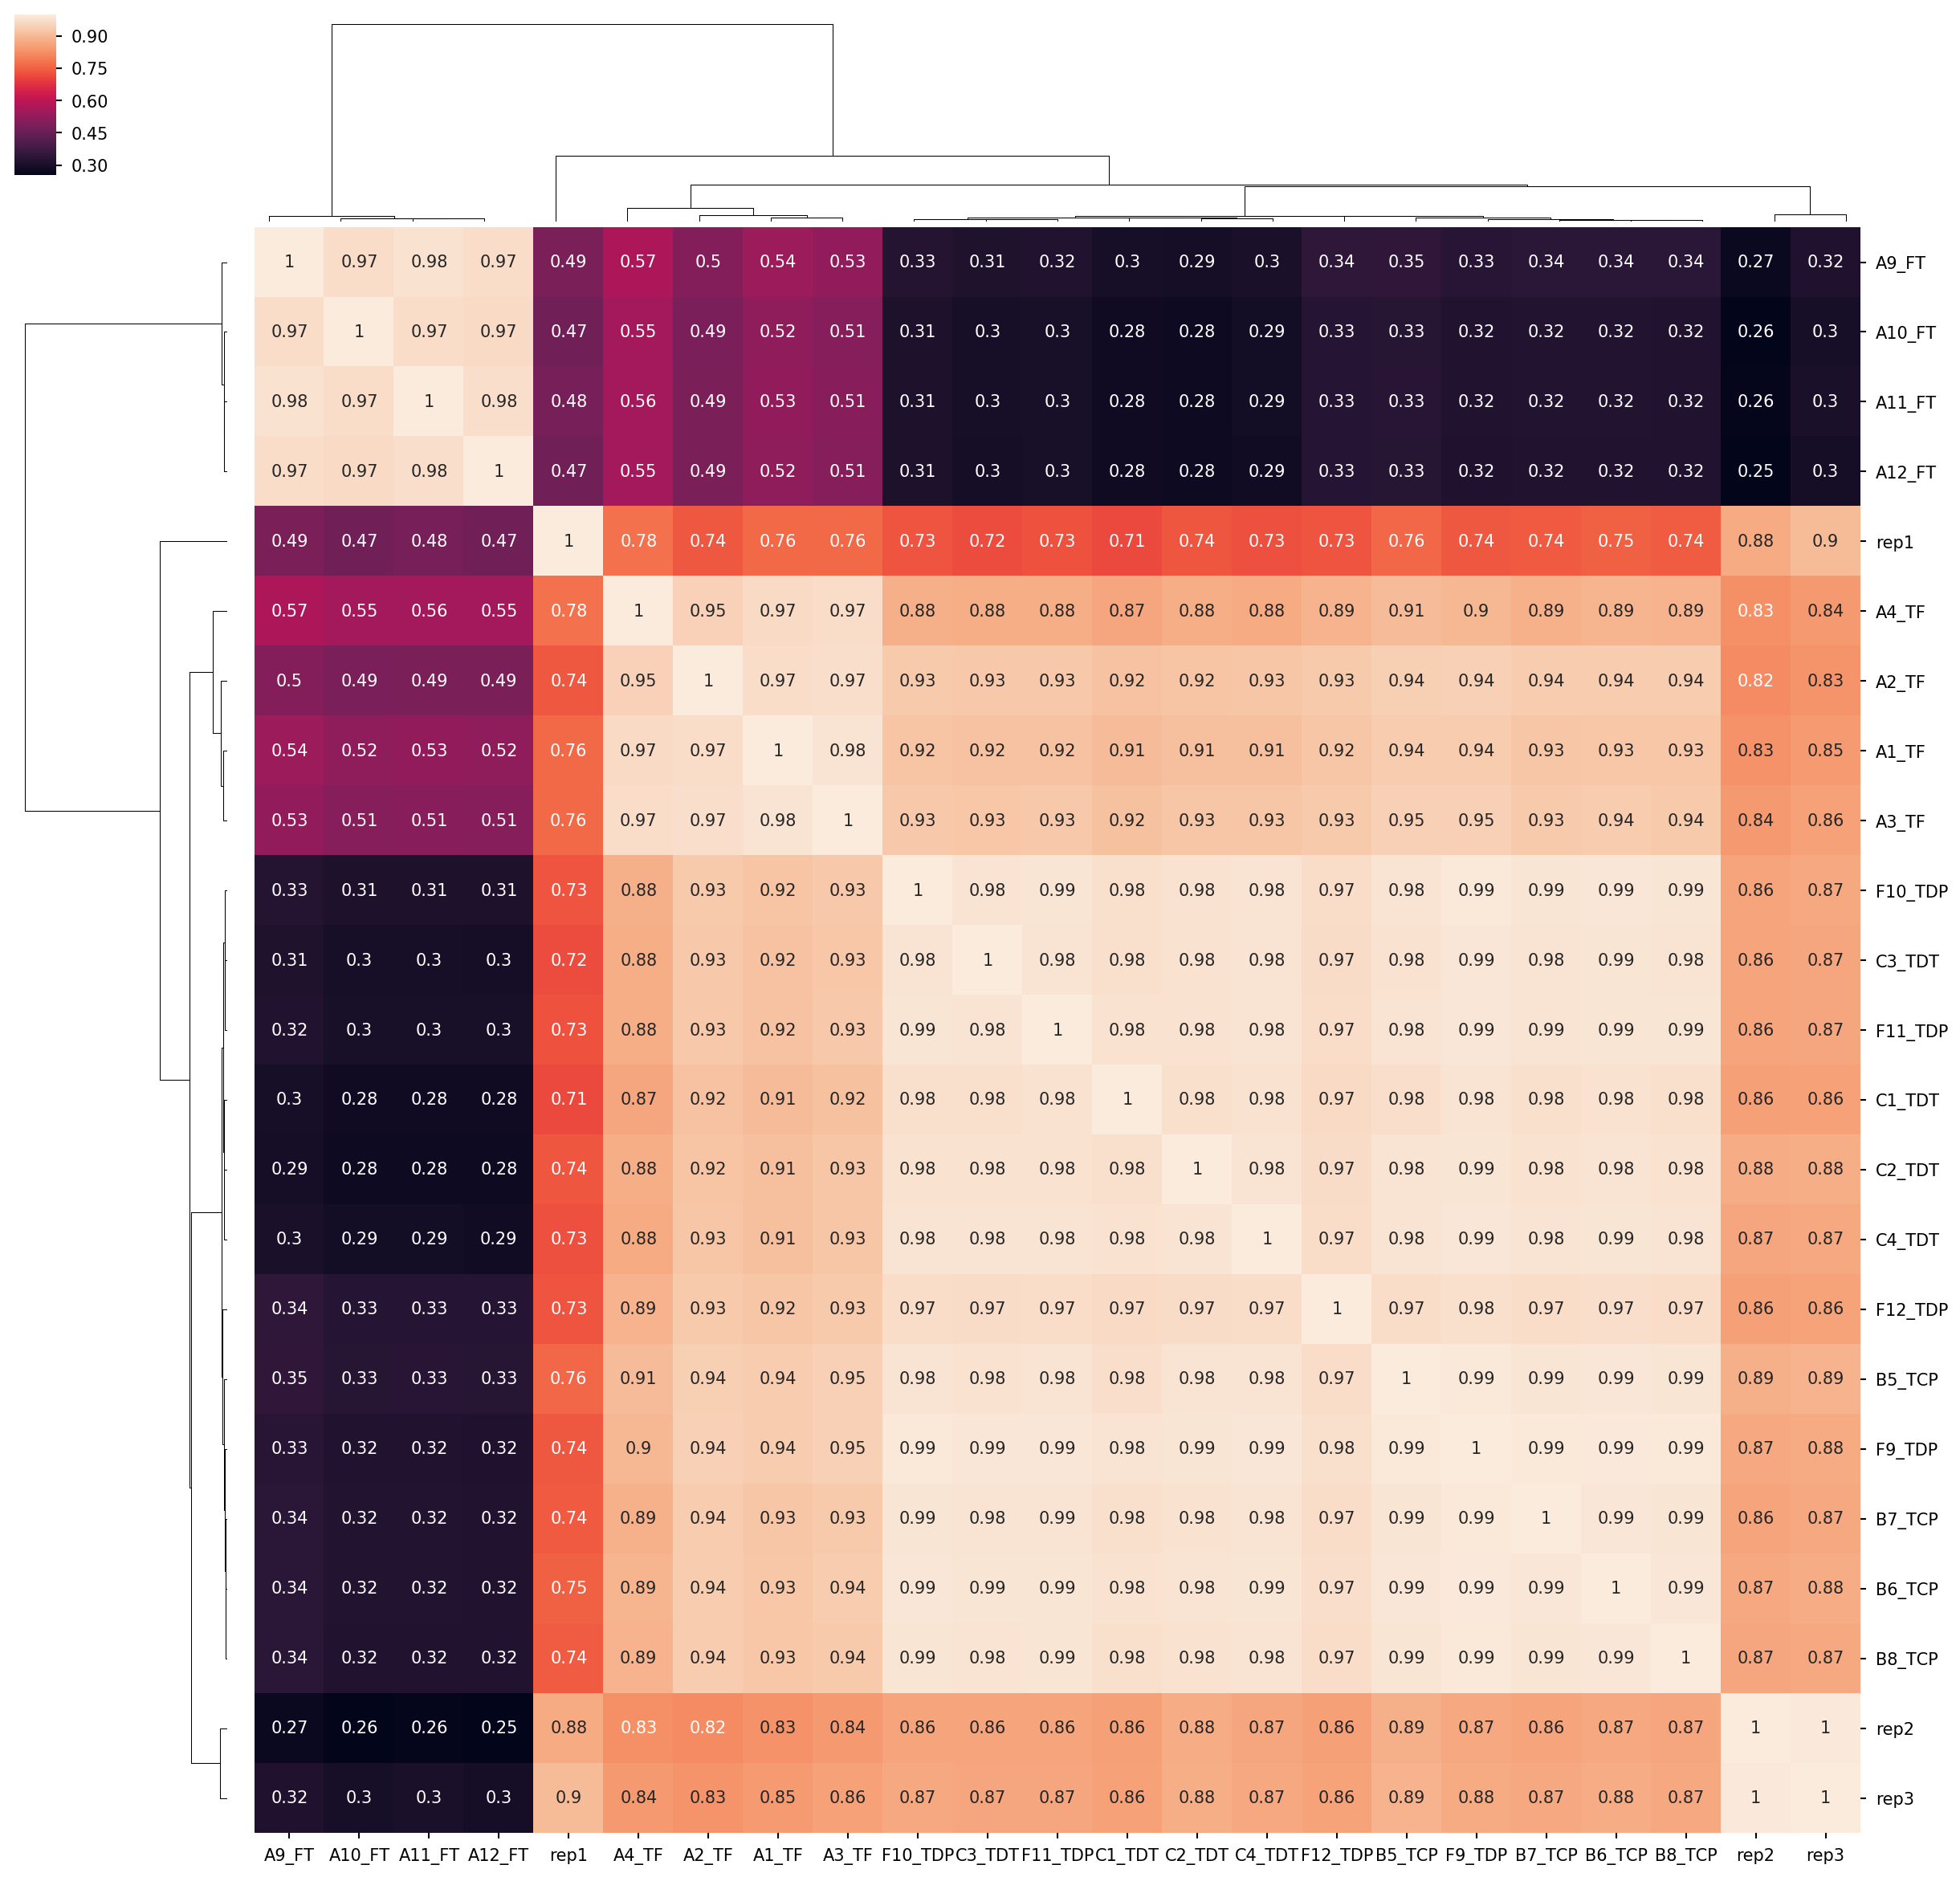

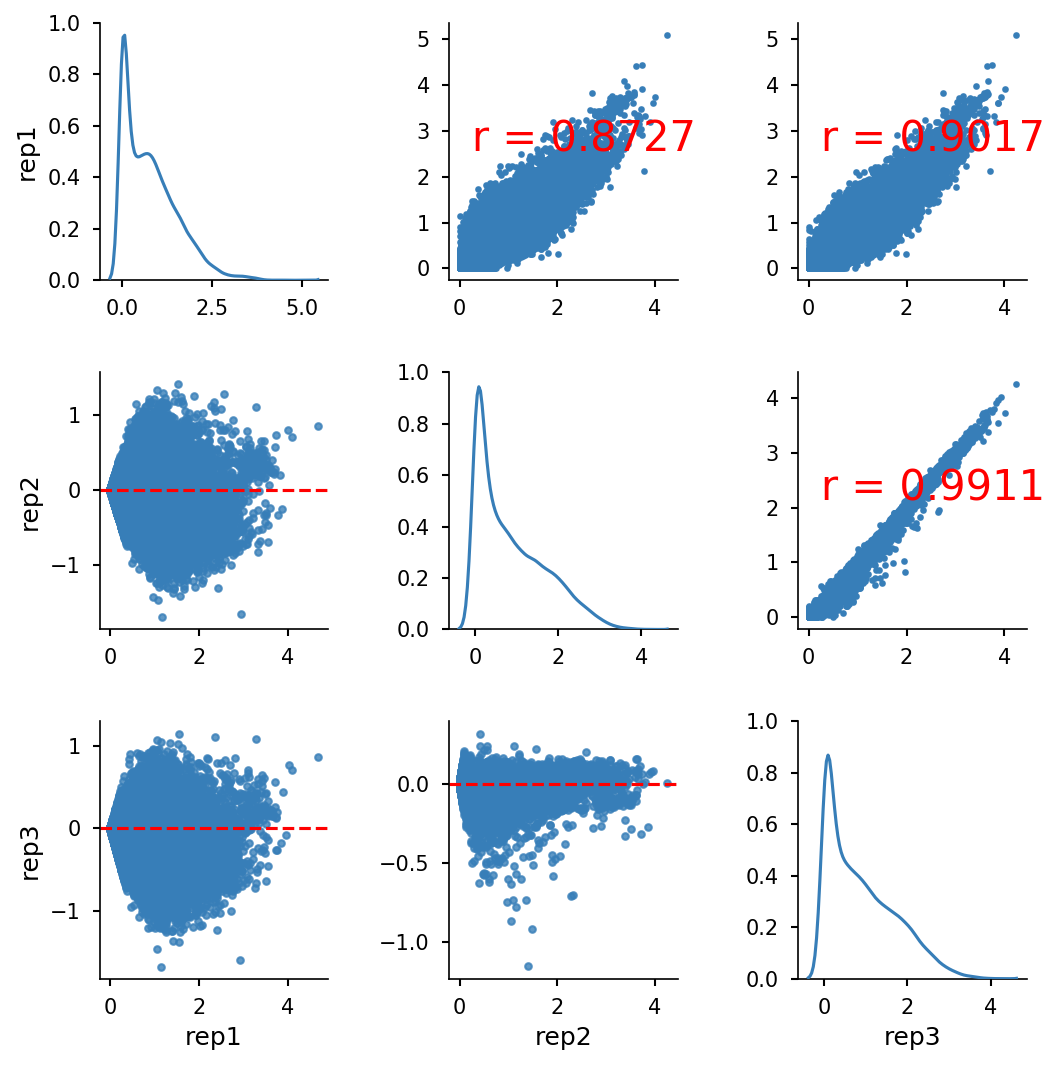

In [10]:
from larval_gonad.bulk import read_bulk, read_bulk_for_lengths, plot_bulk_pairwise_corr 
from larval_gonad.normalization import tpm

stable = pd.read_csv('../bulk-rnaseq-wf/config/sampletable.tsv', sep='\t')

_filter = stable.samplename.tolist()
bulk = read_bulk(Path('../output/bulk-rnaseq-wf/rnaseq_samples'), filter=_filter)
gene_lens = read_bulk_for_lengths(Path('../output/bulk-rnaseq-wf/rnaseq_samples'), filter=_filter)
bulk_tpm = tpm(bulk, gene_lens, log='log10')

raw = nbconfig.seurat.get_raw().T
raw['rep'] = np.array(list(raw.index.str.split('_')))[:, 0]
sc = raw.groupby('rep').sum().T
sc_gene_lens = gene_lens[sc.index]
sc_tpm = tpm(sc, sc_gene_lens, log='log10')

all_tpm = sc_tpm.join(bulk_tpm, how='left')

sns.clustermap(all_tpm.corr(), annot=True, square=True, annot_kws={'fontsize': 10}, figsize=(20, 20))

plot_bulk_pairwise_corr(sc_tpm, corrfunc_kws={'color': 'r'})

### Bulk vs scRNA Cell Types

In [11]:
from larval_gonad.bulk import read_bulk, read_bulk_for_lengths 
from larval_gonad.normalization import tpm

stable = pd.read_csv('../bulk-rnaseq-wf/config/sampletable.tsv', sep='\t')
_filter = stable.samplename.tolist()
bulk = read_bulk(Path('../output/bulk-rnaseq-wf/rnaseq_samples'), filter=_filter)
gene_lens = read_bulk_for_lengths(Path('../output/bulk-rnaseq-wf/rnaseq_samples'), filter=_filter)
bulk_tpm = tpm(bulk, gene_lens, log='log10')

In [12]:
from larval_gonad.scRNAseq import CLUSTER_ANNOT, CLUSTER_ORDER

clusters = nbconfig.seurat.get_clusters()['res.0.6']
clusters.name = 'cluster'
clusters.replace(CLUSTER_ANNOT, inplace=True)

raw = nbconfig.seurat.get_raw()
sc = raw.T.join(clusters).groupby('cluster').sum().T[CLUSTER_ORDER]

In [13]:
sc_gene_lens = gene_lens[sc.index]
sc_tpm = tpm(sc, sc_gene_lens, log='log10')
all_tpm = sc_tpm.join(bulk_tpm, how='left')

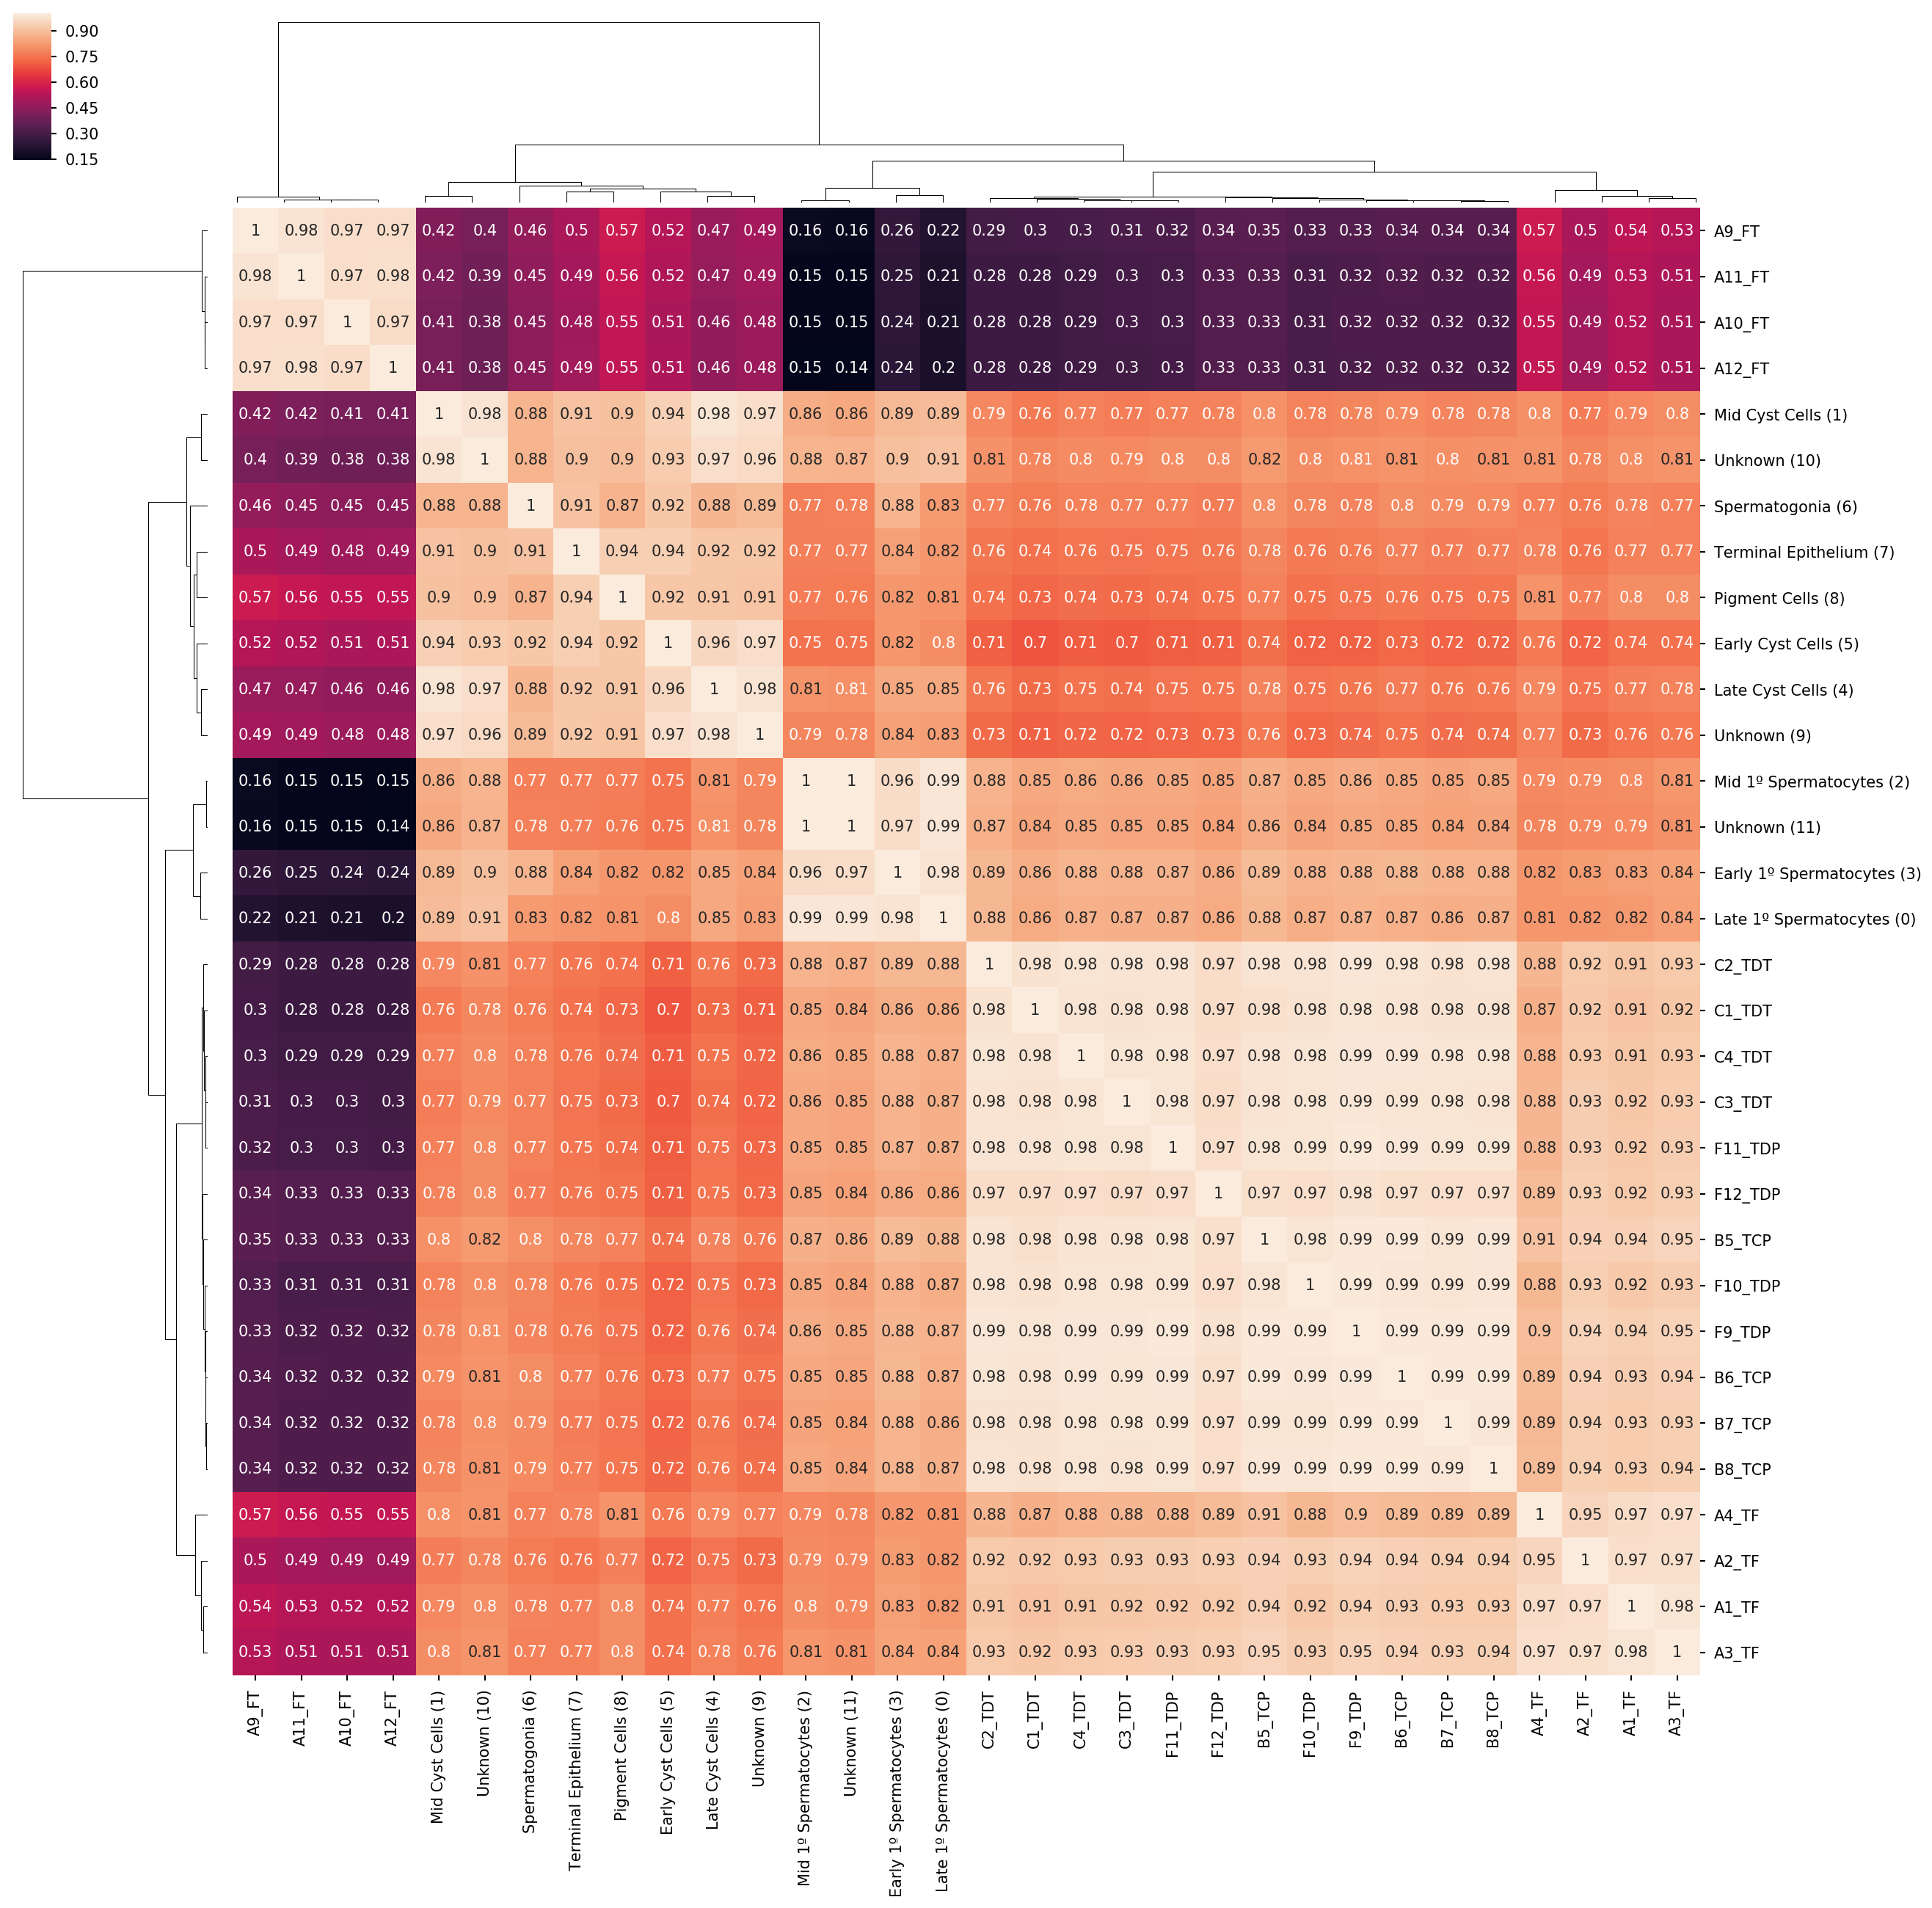

In [14]:
sns.clustermap(all_tpm.corr(), annot=True, square=True, annot_kws={'fontsize': 10}, figsize=(20, 20))

### Intergenic Expression

In [71]:
from larval_gonad.bulk import read_bulk, read_bulk_for_lengths 
from larval_gonad.normalization import tpm, rpkm

stable = pd.read_csv('../bulk-rnaseq-wf/config/sampletable.tsv', sep='\t')
_filter = stable.samplename.tolist()

bulk = read_bulk(
    Path('../output/bulk-rnaseq-wf/rnaseq_samples'), 
    filter=_filter
)

gene_lens = read_bulk_for_lengths(
    Path('../output/bulk-rnaseq-wf/rnaseq_samples'), 
    filter=_filter
)

inter = read_bulk(
    Path('../output/bulk-rnaseq-wf/rnaseq_samples'), 
    pattern='*/*.featurecounts.intergenic.txt', 
    filter=_filter
)

inter_gene = read_bulk_for_lengths(
    Path('../output/bulk-rnaseq-wf/rnaseq_samples'), 
    pattern='*/*.featurecounts.intergenic.txt', 
    filter=_filter
)

In [74]:
dat = pd.concat([inter, bulk])

In [75]:
lens = pd.concat([inter_gene, gene_lens])

In [76]:
norm = tpm(dat, lens, log='log2')

In [82]:
norm_inter = norm[norm.index.str.startswith('inter')]
norm_genic = norm[norm.index.str.startswith('FB')]
norm_ercc = norm[norm.index.str.startswith('ERCC')]

In [87]:
quants = norm_inter.apply(lambda x: np.percentile(x, 95), axis=0)
ic = quants.median()

Text(0.5,0,'Normalized Read Counts (Log2 TPM)')

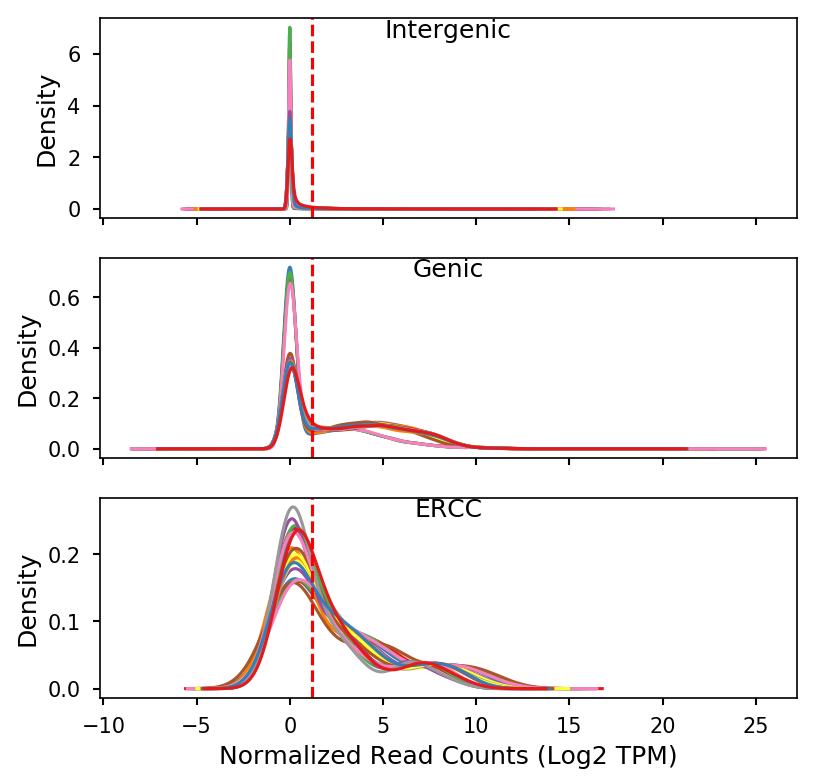

In [94]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
norm_inter.plot(kind='kde', legend=False, ax=ax1)
norm_genic.plot(kind='kde', legend=False, ax=ax2)
norm_ercc.plot(kind='kde', legend=False, ax=ax3)
ax1.axvline(ic, color='r', ls='--')
ax2.axvline(ic, color='r', ls='--')
ax3.axvline(ic, color='r', ls='--')

ax1.text(0.5, 1, 'Intergenic', ha='center', va='top', transform=ax1.transAxes, fontsize=12)
ax2.text(0.5, 1, 'Genic', ha='center', va='top', transform=ax2.transAxes, fontsize=12)
ax3.text(0.5, 1, 'ERCC', ha='center', va='top', transform=ax3.transAxes, fontsize=12)
ax3.set_xlabel('Normalized Read Counts (Log2 TPM)')

In [92]:
quants

A10_FT     0.000000
A11_FT     0.000000
A12_FT     0.000000
A1_TF      1.042290
A2_TF      0.740087
A3_TF      1.178530
A4_TF      0.667955
A9_FT      0.180652
B5_TCP     1.327407
B6_TCP     1.489459
B7_TCP     1.381858
B8_TCP     1.280370
C1_TDT     1.013747
C2_TDT     1.214470
C3_TDT     1.210438
C4_TDT     1.334182
F10_TDP    1.354991
F11_TDP    1.406951
F12_TDP    1.106249
F9_TDP     1.590522
dtype: float64

In [93]:
ic

1.1944841224883849

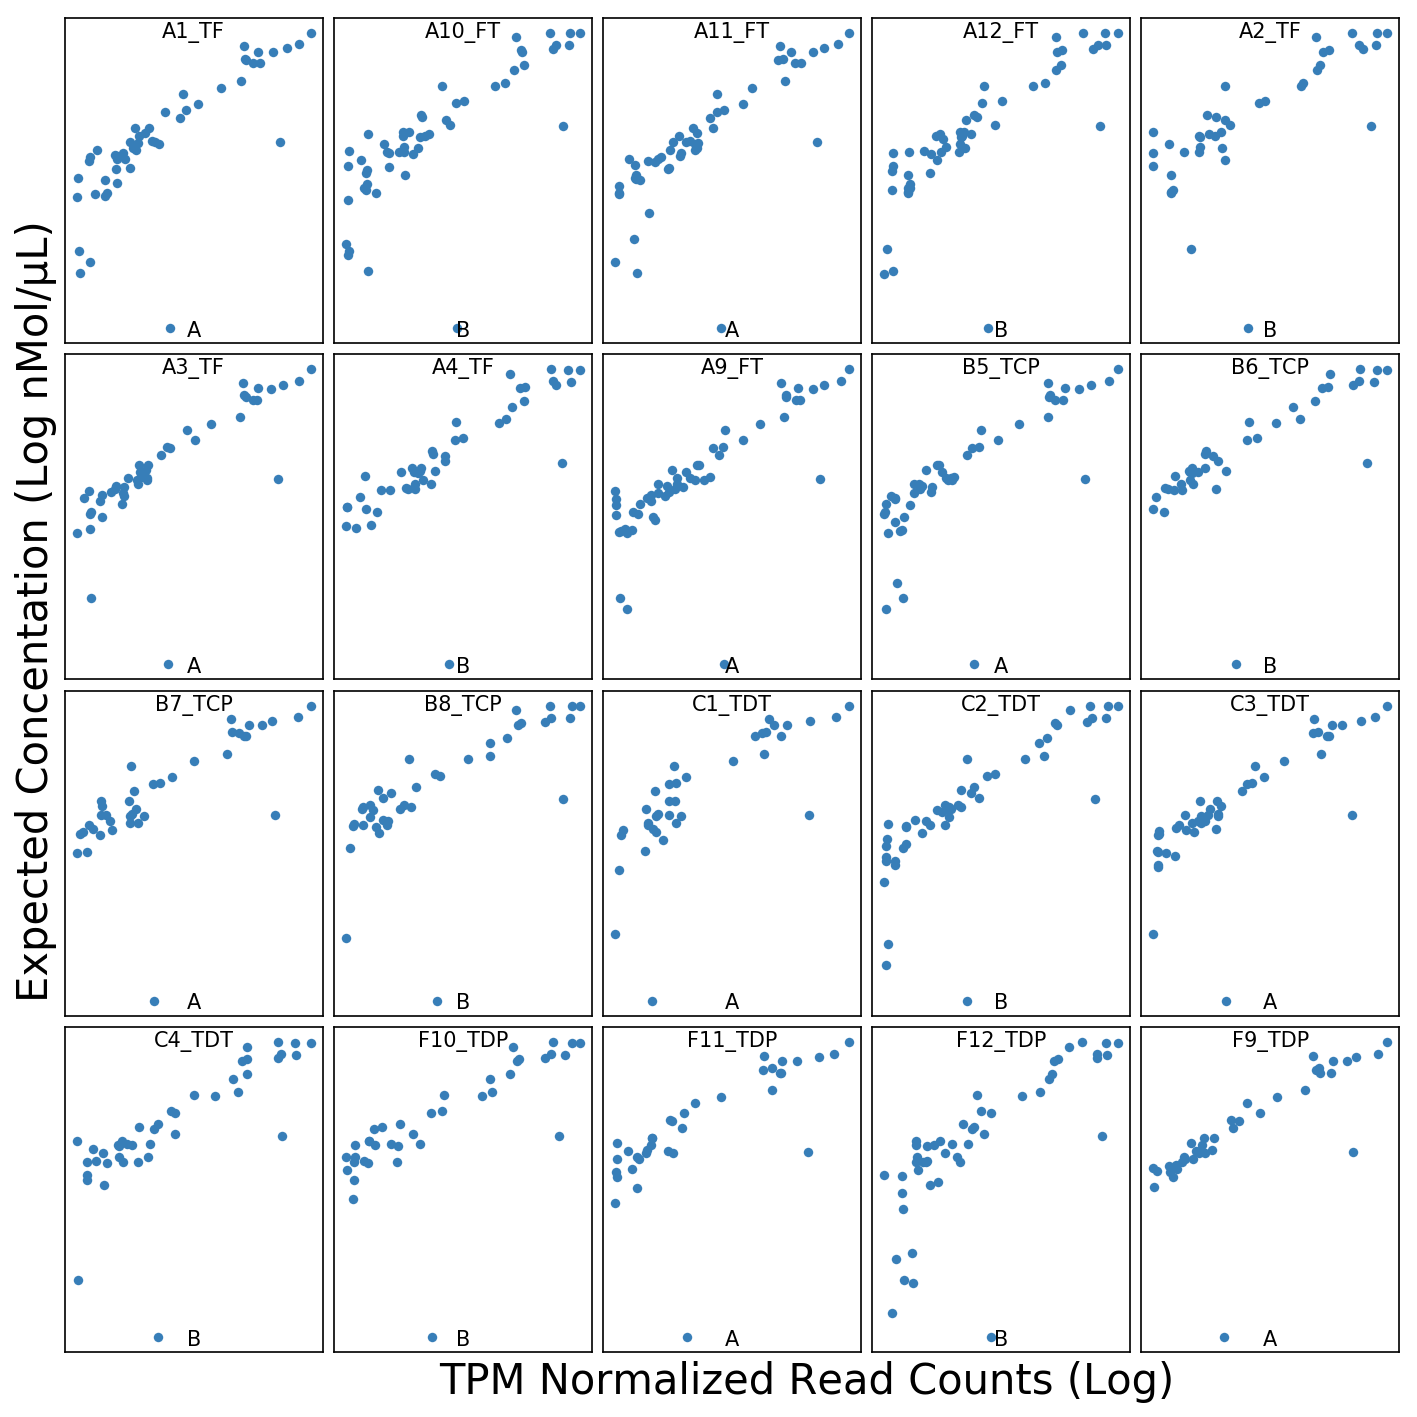

In [112]:
fig, axes = plt.subplots(4, 5, figsize=(10, 10))
mapper = {
    'A': '78A_nmol_per_ul',
    'B': '78B_nmol_per_ul',
}

for (record, ax) in zip(stable.to_records(), axes.flatten()):
    _sample = record.samplename
    _pool = record.ercc
    _dat = norm_ercc.loc[norm_ercc[_sample] > ic, _sample].to_frame()
    _dat.columns = [_sample]

    _dat.join(lee_anno).plot(_sample, mapper[_pool], kind='scatter', logy=True, ax=ax)
    ax.text(0.5, .99, _sample, ha='center', va='top', fontsize=10, transform=ax.transAxes)
    ax.text(0.5, .01, _pool, ha='center', va='bottom', fontsize=10, transform=ax.transAxes)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
plt.text(0, 0.5, 'Expected Concentation (Log nMol/µL)', 
         ha='right', va='center', 
         transform=fig.transFigure, rotation=90)
plt.text(0.5, 0, 'TPM Normalized Read Counts (Log)', 
         ha='center', va='top', 
         transform=fig.transFigure)
plt.tight_layout(pad=.1, rect=[0, 0, .9, .9])